In [19]:
import pandas as pd
import numpy as np
import sys
from pathlib import Path

# Add project root to path
sys.path.append(str(Path.cwd().parent))

# Import from utils package
from utils.eda_numerical_helpers import (
    profile_numeric_feature
)

from loguru import logger

logger.success("✅ All imports successful!")

2026-01-08 16:38:10.135 | SUCCESS  | __main__:<module>:16 - ✅ All imports successful!


In [2]:
file_path = '../data/raw/loan_preprocessed.parquet'

def read_data(file_path = file_path):
    """Reads the dataset from the preprocessed data - Parquet file."""
    logger.info(f"Reading data from {file_path}...")
    try: 
        df = pd.read_parquet(file_path)
        logger.success("Data read successfully.")
        return df
    except Exception as e:
        logger.error(f"Error reading data: {e}")
        raise e 


df = read_data()
# rename target column for use of helper functions
df.rename(columns={'loan_status': 'target'}, inplace=True)

df['target'] = df['target'].map({
    'Fully Paid': 0,
    'Charged Off': 1,
    'Default': 1    

})

drop_numeric_cols = [
    'annual_inc_joint',
    'dti_joint',
    'revol_bal_joint',
    'sec_app_inq_last_6mths',
    'sec_app_mort_acc',
    'sec_app_open_acc',
    'sec_app_revol_util',
    'sec_app_open_act_il',
    'sec_app_num_rev_accts',
    'sec_app_chargeoff_within_12_mths',
    'sec_app_collections_12_mths_ex_med',
    'sec_app_mths_since_last_major_derog'
]

df = df.drop(columns=drop_numeric_cols, errors='ignore')
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns



2026-01-08 16:34:16.337 | INFO     | __main__:read_data:5 - Reading data from ../data/raw/loan_preprocessed.parquet...
2026-01-08 16:34:16.775 | SUCCESS  | __main__:read_data:8 - Data read successfully.


In [15]:
numerical_columns

Index(['loan_amnt', 'annual_inc', 'target', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', '

### Loan Amount

2026-01-08 16:38:55.834 | INFO     | utils.eda_numerical_helpers:profile_numeric_feature:40 - Profiling numeric feature: loan_amnt
2026-01-08 16:38:56.018 | SUCCESS  | utils.eda_numerical_helpers:profile_numeric_feature:170 - Profiling complete for loan_amnt



NUMERIC FEATURE PROFILE: loan_amnt

──────────────────────────────────────────────────────────────────────
Basic Statistics:
  Valid rows: 1,303,638 (100.00%)
  Missing: 0 (0.00%)
  Unique values: 1553
  Range: [500.00, 40000.00]
  Mean: 14416.84, Median: 12000.00
  Std Dev: 8699.57, Skew: 0.78

──────────────────────────────────────────────────────────────────────
Percentiles (for capping decisions):
  p1: 1500.00
  p5: 3200.00
  p95: 32625.00
  p99: 35000.00
  p99.5: 38150.00

──────────────────────────────────────────────────────────────────────
Association with Default:
  Point-biserial correlation: 0.0652
  P-value: 0.00e+00
  Information Value (IV): 0.0342
  IV Interpretation: WEAK

──────────────────────────────────────────────────────────────────────
Default Rate by Bin:
              _bin  count  defaults  default_rate_%
 (499.999, 5000.0] 175591     27976       15.932479
  (5000.0, 6500.0]  86103     13788       16.013379
  (6500.0, 8725.0] 129476     22054       17.033273
 

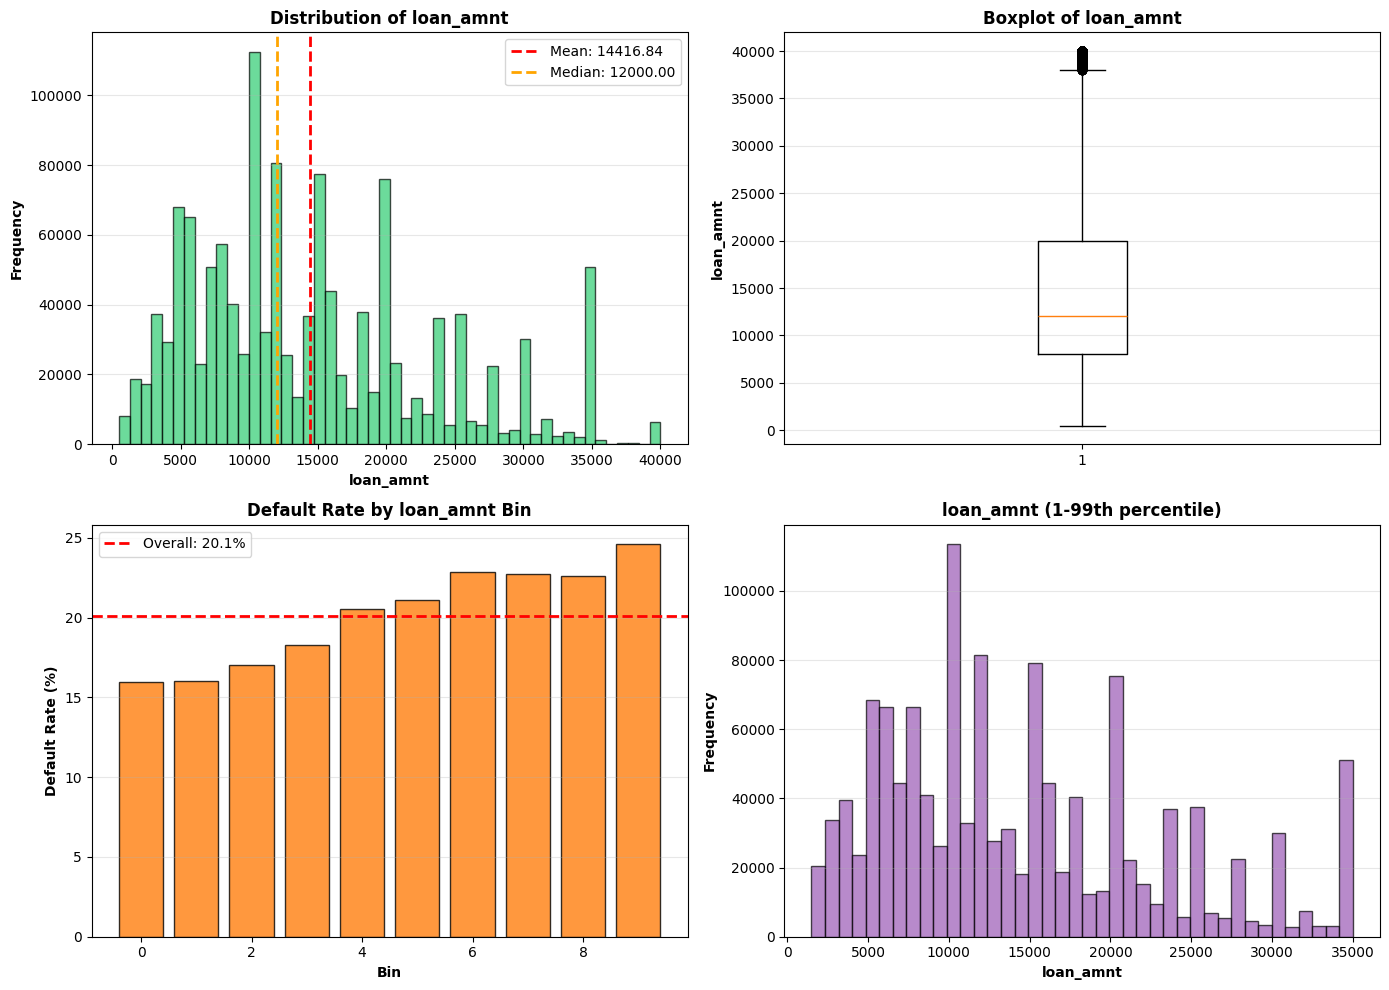

✅ Plots generated


In [21]:
from utils.eda_numerical_helpers import (
    profile_numeric_feature
)
profile_numeric_feature = profile_numeric_feature(df,'loan_amnt')

### annual_inc

2026-01-08 16:38:58.437 | INFO     | utils.eda_numerical_helpers:profile_numeric_feature:40 - Profiling numeric feature: annual_inc
2026-01-08 16:38:58.731 | SUCCESS  | utils.eda_numerical_helpers:profile_numeric_feature:170 - Profiling complete for annual_inc



NUMERIC FEATURE PROFILE: annual_inc

──────────────────────────────────────────────────────────────────────
Basic Statistics:
  Valid rows: 1,303,638 (100.00%)
  Missing: 0 (0.00%)
  Unique values: 62989
  Range: [0.00, 10999200.00]
  Mean: 76158.75, Median: 65000.00
  Std Dev: 70048.27, Skew: 47.12

──────────────────────────────────────────────────────────────────────
Percentiles (for capping decisions):
  p1: 18000.00
  p5: 28000.00
  p95: 155000.00
  p99: 250000.00
  p99.5: 320000.00

──────────────────────────────────────────────────────────────────────
Association with Default:
  Point-biserial correlation: -0.0417
  P-value: 0.00e+00
  Information Value (IV): 0.0295
  IV Interpretation: WEAK

──────────────────────────────────────────────────────────────────────
Default Rate by Bin:
                  _bin  count  defaults  default_rate_%
     (-0.001, 34000.0] 131204     31826       24.256882
    (34000.0, 42000.0] 135075     31164       23.071627
    (42000.0, 50000.0] 153292 

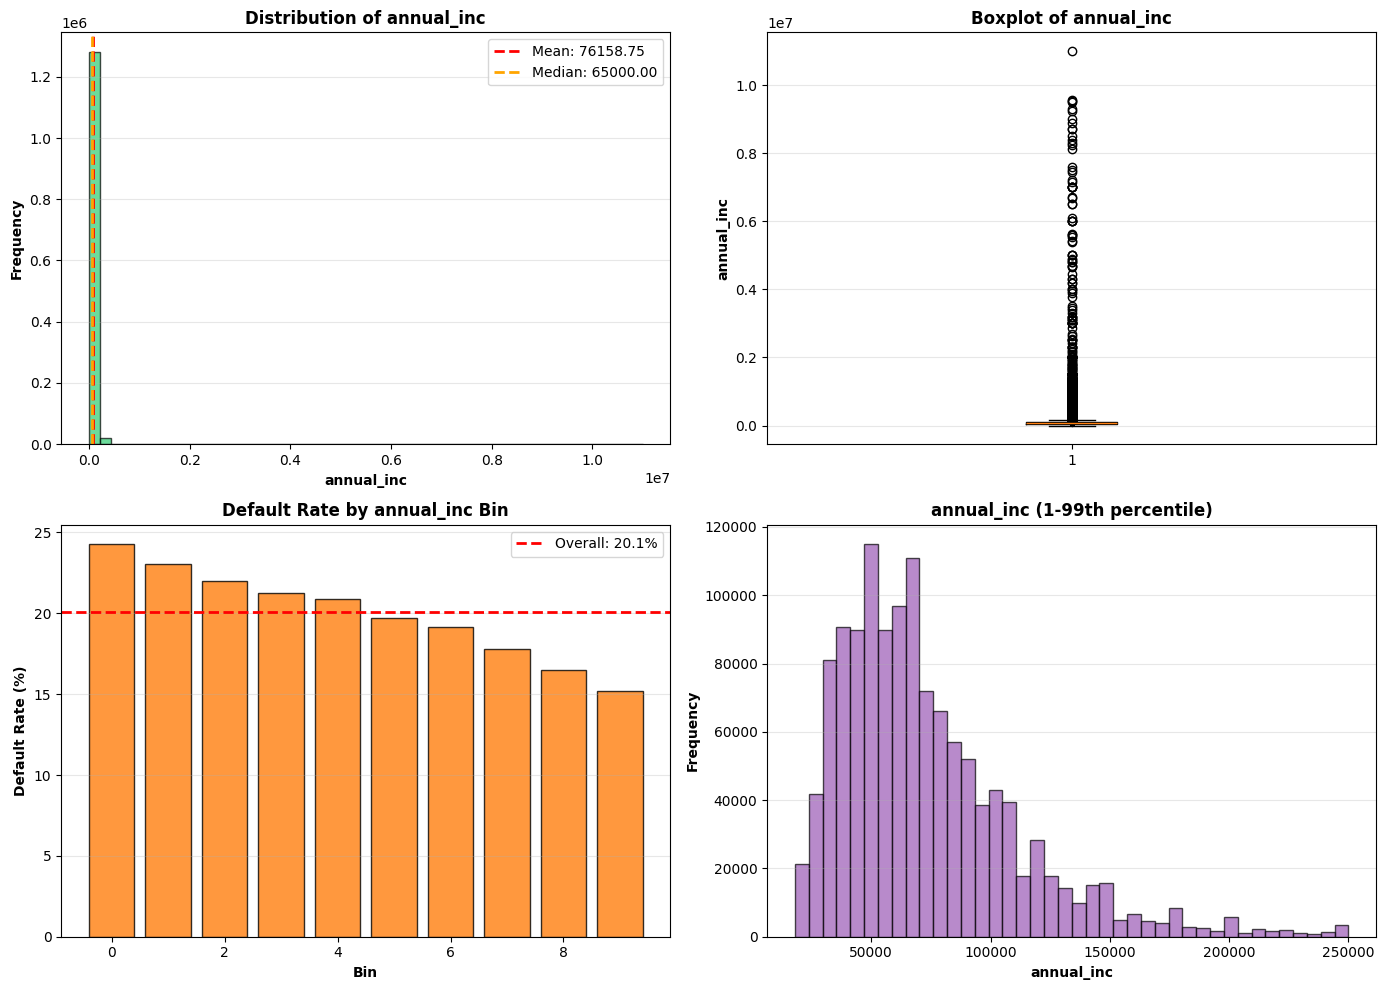

✅ Plots generated


In [22]:
from utils.eda_numerical_helpers import (
    profile_numeric_feature
)
result = profile_numeric_feature(df, 'annual_inc', plot=True)

### DTI

2026-01-08 18:09:08.587 | INFO     | utils.eda_numerical_helpers:profile_numeric_feature:40 - Profiling numeric feature: dti
2026-01-08 18:09:08.874 | SUCCESS  | utils.eda_numerical_helpers:profile_numeric_feature:170 - Profiling complete for dti



NUMERIC FEATURE PROFILE: dti

──────────────────────────────────────────────────────────────────────
Basic Statistics:
  Valid rows: 1,303,326 (99.98%)
  Missing: 312 (0.02%)
  Unique values: 6870
  Range: [-1.00, 999.00]
  Mean: 18.26, Median: 17.61
  Std Dev: 10.94, Skew: 26.27

──────────────────────────────────────────────────────────────────────
Percentiles (for capping decisions):
  p1: 1.79
  p5: 4.99
  p95: 32.94
  p99: 38.37
  p99.5: 39.88

──────────────────────────────────────────────────────────────────────
Association with Default:
  Point-biserial correlation: 0.0872
  P-value: 0.00e+00
  Information Value (IV): 0.0749
  IV Interpretation: WEAK

──────────────────────────────────────────────────────────────────────
Default Rate by Bin:
          _bin  count  defaults  default_rate_%
(-1.001, 7.27] 130410     19054       14.610843
 (7.27, 10.48] 130266     19917       15.289485
(10.48, 13.01] 130425     21245       16.289055
(13.01, 15.32] 130513     22703       17.395202

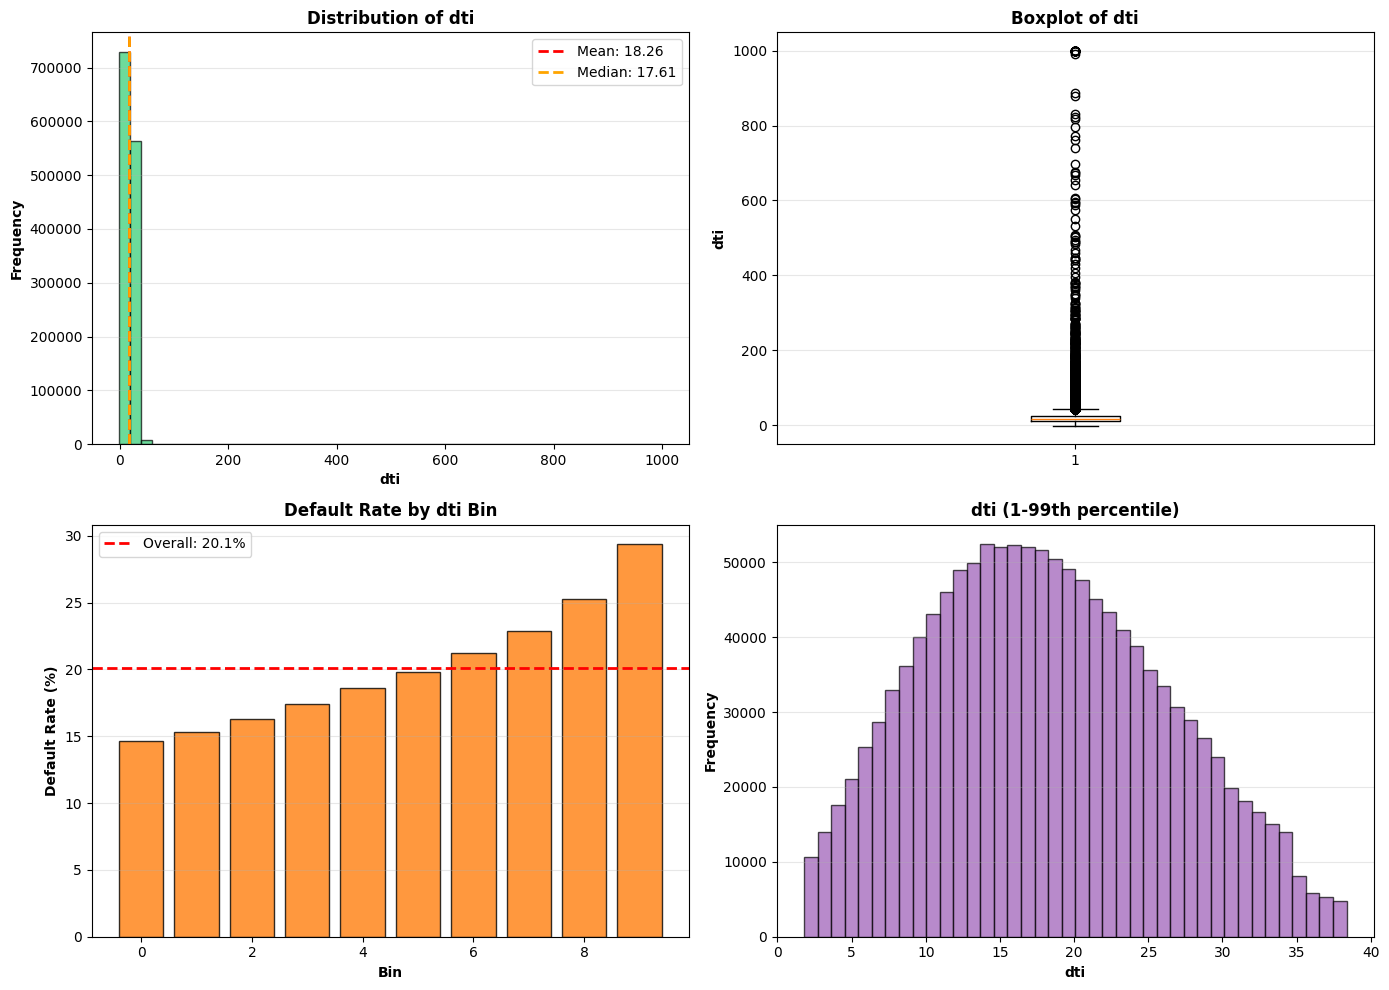

✅ Plots generated


In [26]:
from utils.eda_numerical_helpers import (
    profile_numeric_feature
)
result = profile_numeric_feature(df, 'dti', plot=True)

### delinq_2yrs

2026-01-08 18:33:37.117 | INFO     | utils.eda_numerical_helpers:profile_numeric_feature:40 - Profiling numeric feature: delinq_2yrs
2026-01-08 18:33:37.302 | SUCCESS  | utils.eda_numerical_helpers:profile_numeric_feature:170 - Profiling complete for delinq_2yrs



NUMERIC FEATURE PROFILE: delinq_2yrs

──────────────────────────────────────────────────────────────────────
Basic Statistics:
  Valid rows: 1,303,638 (100.00%)
  Missing: 0 (0.00%)
  Unique values: 30
  Range: [0.00, 39.00]
  Mean: 0.32, Median: 0.00
  Std Dev: 0.88, Skew: 5.58

──────────────────────────────────────────────────────────────────────
Percentiles (for capping decisions):
  p1: 0.00
  p5: 0.00
  p95: 2.00
  p99: 4.00
  p99.5: 5.00

──────────────────────────────────────────────────────────────────────
Association with Default:
  Point-biserial correlation: 0.0201
  P-value: 4.47e-116
  Information Value (IV): 0.0020
  IV Interpretation: NEGLIGIBLE

──────────────────────────────────────────────────────────────────────
Default Rate by Bin:
         _bin   count  defaults  default_rate_%
(-0.001, 1.0] 1219430    242423       19.880026
  (1.0, 39.0]   84208     19263       22.875499
  Pattern: MONOTONIC (increasing)

Generating plots...


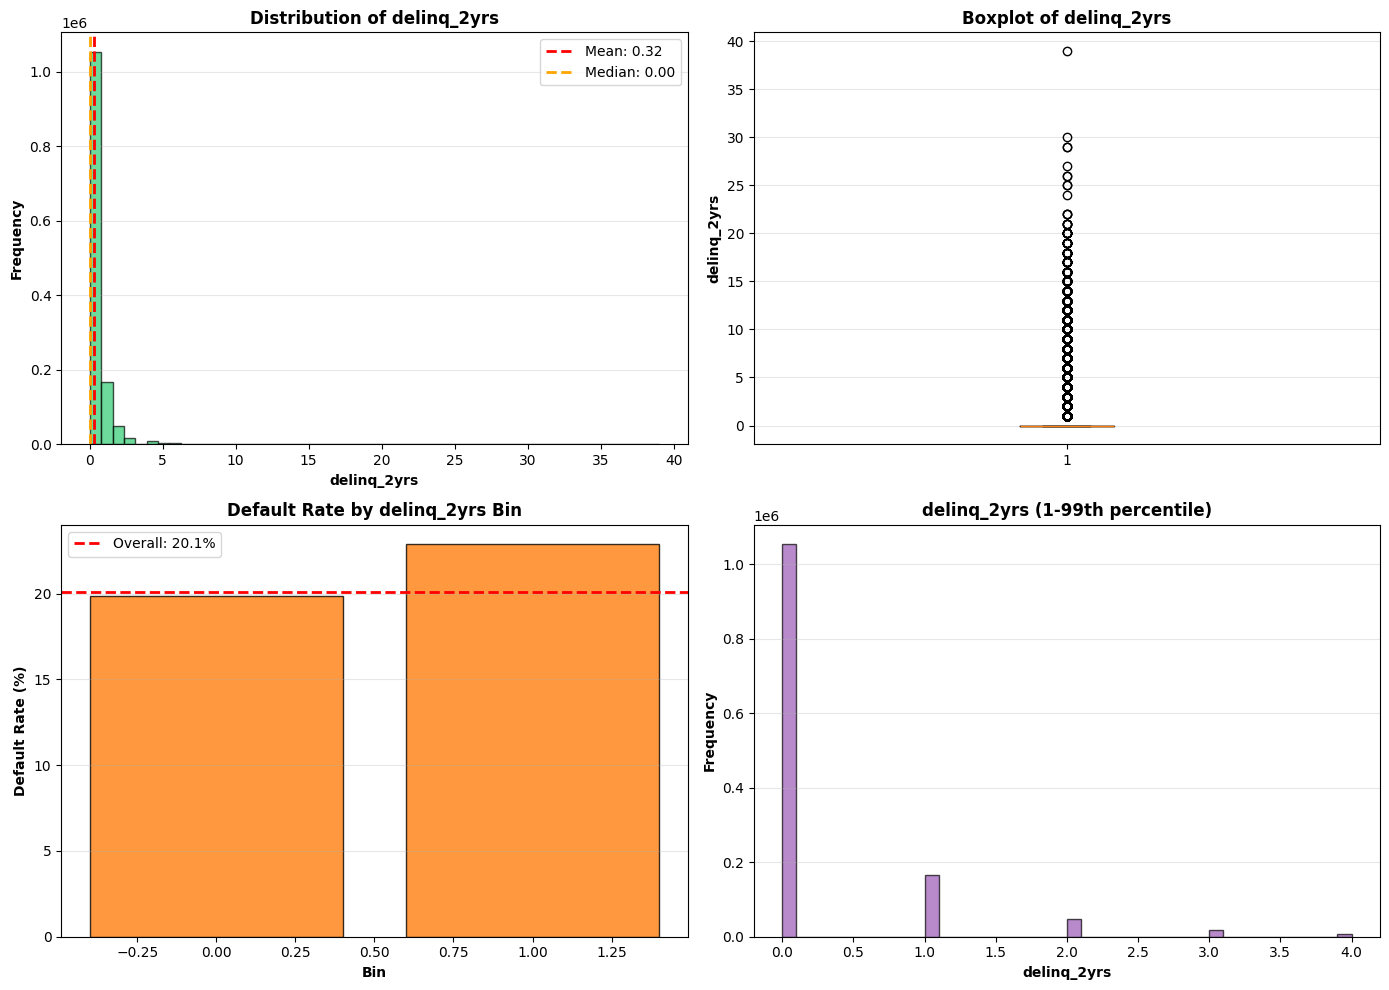

✅ Plots generated


In [33]:
from utils.eda_numerical_helpers import (
    profile_numeric_feature
)
result = profile_numeric_feature(df, 'delinq_2yrs', plot=True)

### inq_last_6mths

2026-01-08 18:45:47.066 | INFO     | utils.eda_numerical_helpers:profile_numeric_feature:40 - Profiling numeric feature: inq_last_6mths
2026-01-08 18:45:47.316 | SUCCESS  | utils.eda_numerical_helpers:profile_numeric_feature:170 - Profiling complete for inq_last_6mths



NUMERIC FEATURE PROFILE: inq_last_6mths

──────────────────────────────────────────────────────────────────────
Basic Statistics:
  Valid rows: 1,303,637 (100.00%)
  Missing: 1 (0.00%)
  Unique values: 9
  Range: [0.00, 8.00]
  Mean: 0.66, Median: 0.00
  Std Dev: 0.94, Skew: 1.69

──────────────────────────────────────────────────────────────────────
Percentiles (for capping decisions):
  p1: 0.00
  p5: 0.00
  p95: 3.00
  p99: 4.00
  p99.5: 4.00

──────────────────────────────────────────────────────────────────────
Association with Default:
  Point-biserial correlation: 0.0651
  P-value: 0.00e+00
  Information Value (IV): 0.0171
  IV Interpretation: NEGLIGIBLE

──────────────────────────────────────────────────────────────────────
Default Rate by Bin:
         _bin   count  defaults  default_rate_%
(-0.001, 1.0] 1100163    210828       19.163342
   (1.0, 2.0]  133401     32092       24.056791
   (2.0, 8.0]   70073     18766       26.780643
  Pattern: MONOTONIC (increasing)

Generatin

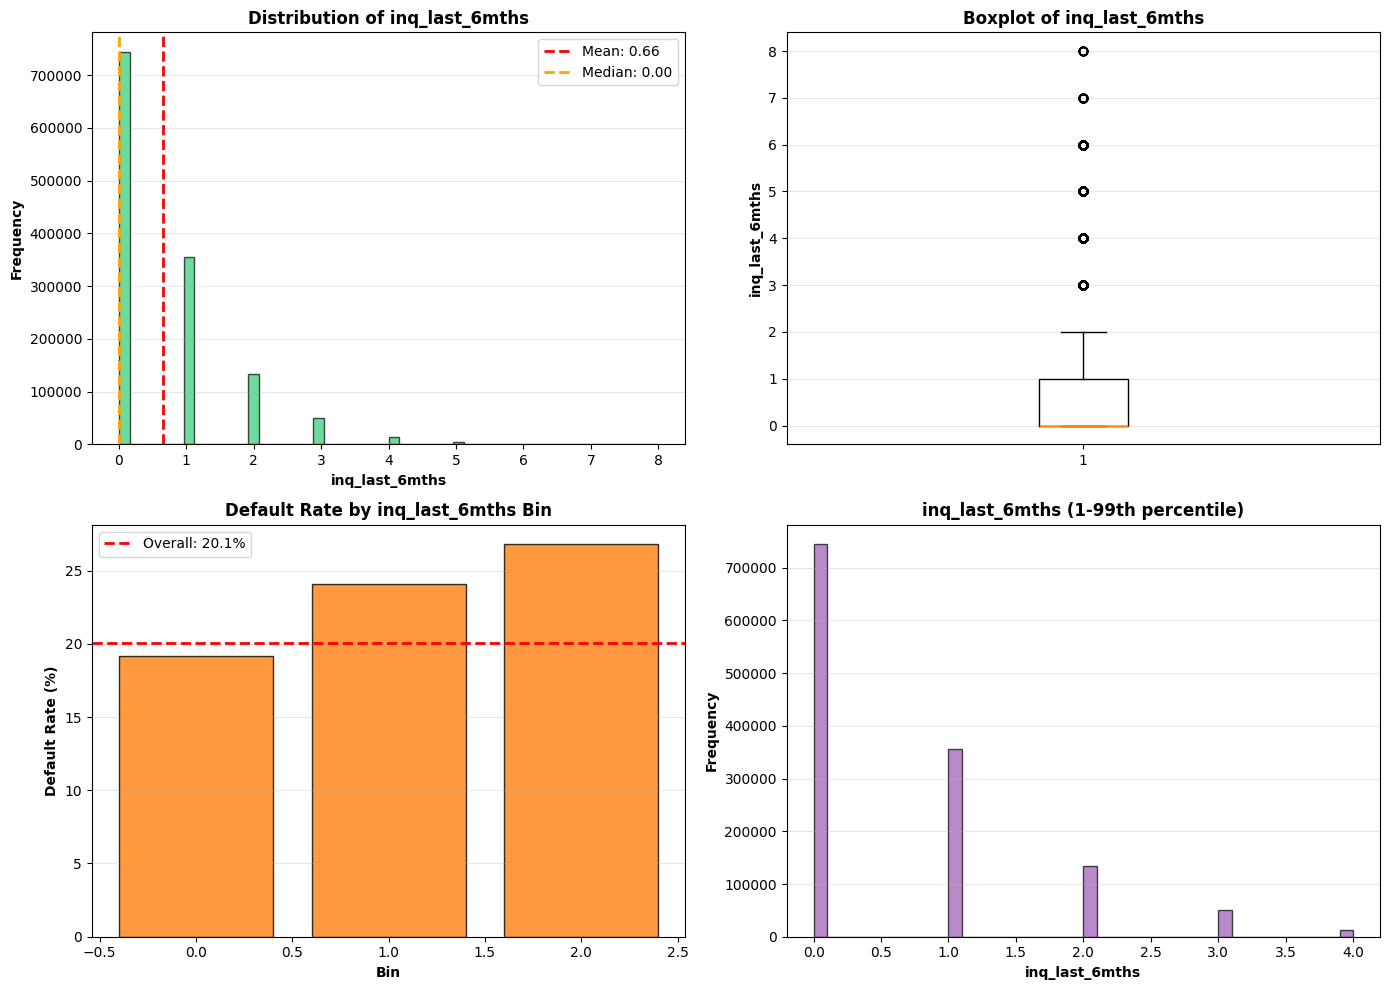

✅ Plots generated


In [36]:
from utils.eda_numerical_helpers import (
    profile_numeric_feature
)
result = profile_numeric_feature(df, 'inq_last_6mths', plot=True)

### mths_since_last_delinq

2026-01-08 18:58:30.013 | INFO     | utils.eda_numerical_helpers:profile_numeric_feature:40 - Profiling numeric feature: mths_since_last_delinq
2026-01-08 18:58:30.201 | SUCCESS  | utils.eda_numerical_helpers:profile_numeric_feature:170 - Profiling complete for mths_since_last_delinq



NUMERIC FEATURE PROFILE: mths_since_last_delinq

──────────────────────────────────────────────────────────────────────
Basic Statistics:
  Valid rows: 645,805 (49.54%)
  Missing: 657,833 (50.46%)
  Unique values: 163
  Range: [0.00, 226.00]
  Mean: 34.32, Median: 31.00
  Std Dev: 21.92, Skew: 0.45

──────────────────────────────────────────────────────────────────────
Percentiles (for capping decisions):
  p1: 1.00
  p5: 5.00
  p95: 74.00
  p99: 80.00
  p99.5: 81.00

──────────────────────────────────────────────────────────────────────
Association with Default:
  Point-biserial correlation: -0.0128
  P-value: 6.13e-25
  Information Value (IV): 0.0015
  IV Interpretation: NEGLIGIBLE

──────────────────────────────────────────────────────────────────────
Default Rate by Bin:
         _bin  count  defaults  default_rate_%
(-0.001, 8.0]  75938     16792       22.112776
  (8.0, 13.0]  60032     12904       21.495203
 (13.0, 19.0]  67887     14413       21.230869
 (19.0, 25.0]  63086     

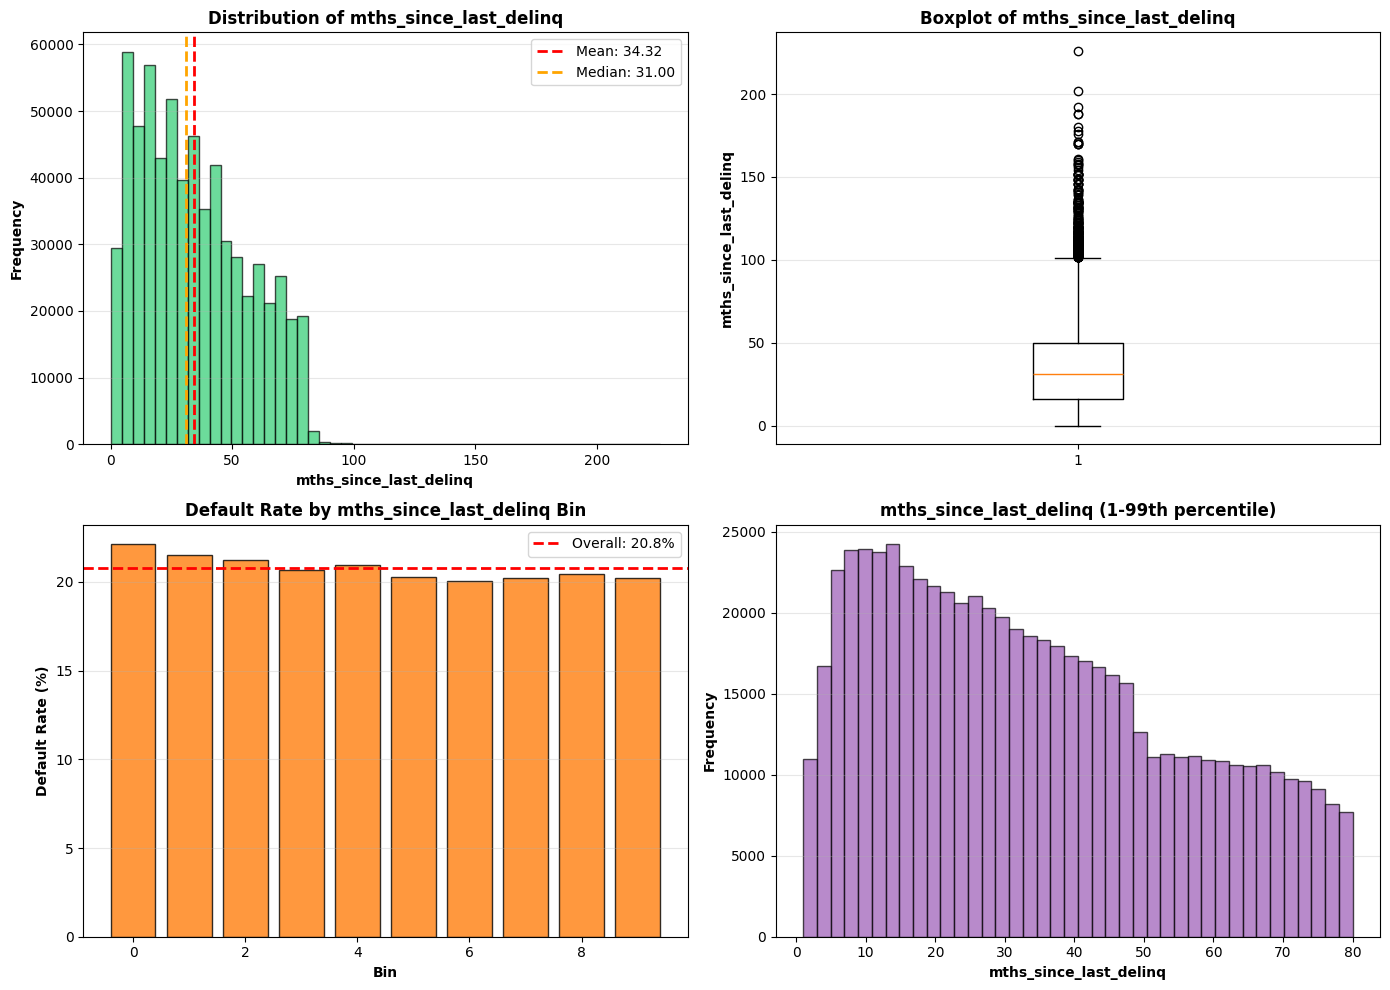

✅ Plots generated


In [40]:
from utils.eda_numerical_helpers import (
    profile_numeric_feature
)
result = profile_numeric_feature(df, 'mths_since_last_delinq', plot=True)

### mths_since_last_record

2026-01-08 19:22:32.226 | INFO     | utils.eda_numerical_helpers:profile_numeric_feature:40 - Profiling numeric feature: mths_since_last_record
2026-01-08 19:22:32.304 | SUCCESS  | utils.eda_numerical_helpers:profile_numeric_feature:170 - Profiling complete for mths_since_last_record



NUMERIC FEATURE PROFILE: mths_since_last_record

──────────────────────────────────────────────────────────────────────
Basic Statistics:
  Valid rows: 221,773 (17.01%)
  Missing: 1,081,865 (82.99%)
  Unique values: 124
  Range: [0.00, 129.00]
  Mean: 70.61, Median: 72.00
  Std Dev: 26.61, Skew: -0.25

──────────────────────────────────────────────────────────────────────
Percentiles (for capping decisions):
  p1: 7.00
  p5: 24.00
  p95: 113.00
  p99: 118.00
  p99.5: 118.00

──────────────────────────────────────────────────────────────────────
Association with Default:
  Point-biserial correlation: 0.0077
  P-value: 2.80e-04
  Information Value (IV): 0.0040
  IV Interpretation: NEGLIGIBLE

──────────────────────────────────────────────────────────────────────
Default Rate by Bin:
          _bin  count  defaults  default_rate_%
(-0.001, 35.0]  23408      5281       22.560663
  (35.0, 48.0]  22259      4822       21.663147
  (48.0, 57.0]  22311      4794       21.487159
  (57.0, 65.0] 

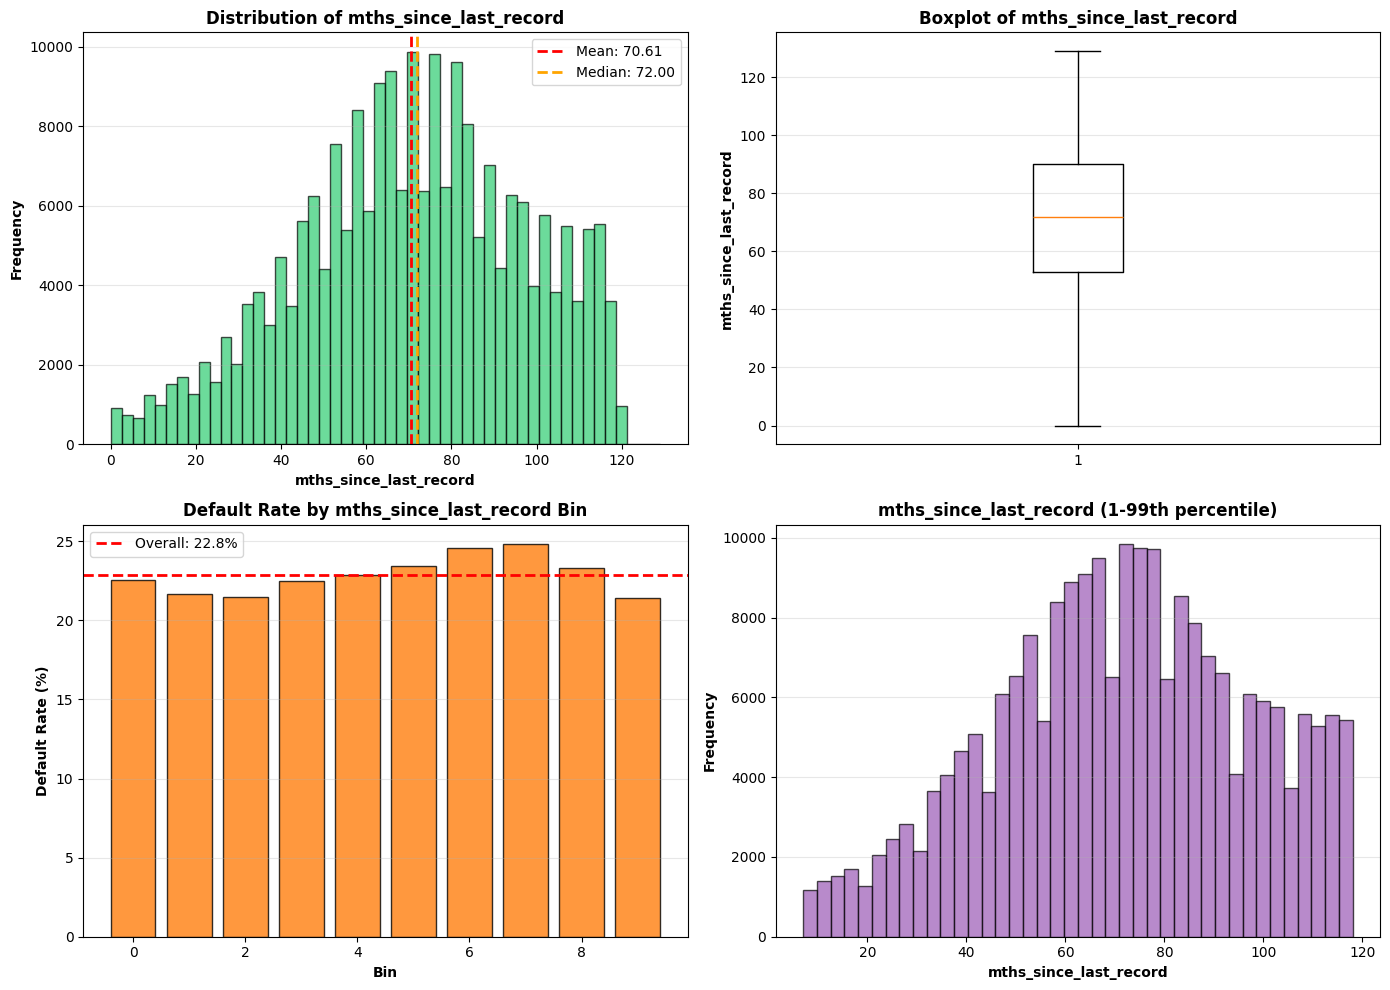

✅ Plots generated


In [43]:
from utils.eda_numerical_helpers import (
    profile_numeric_feature
)
result = profile_numeric_feature(df, 'mths_since_last_record', plot=True)

### open_acc

2026-01-08 19:40:44.389 | INFO     | utils.eda_numerical_helpers:profile_numeric_feature:40 - Profiling numeric feature: open_acc
2026-01-08 19:40:44.689 | SUCCESS  | utils.eda_numerical_helpers:profile_numeric_feature:170 - Profiling complete for open_acc



NUMERIC FEATURE PROFILE: open_acc

──────────────────────────────────────────────────────────────────────
Basic Statistics:
  Valid rows: 1,303,638 (100.00%)
  Missing: 0 (0.00%)
  Unique values: 84
  Range: [0.00, 90.00]
  Mean: 11.59, Median: 11.00
  Std Dev: 5.47, Skew: 1.30

──────────────────────────────────────────────────────────────────────
Percentiles (for capping decisions):
  p1: 3.00
  p5: 5.00
  p95: 22.00
  p99: 29.00
  p99.5: 32.00

──────────────────────────────────────────────────────────────────────
Association with Default:
  Point-biserial correlation: 0.0288
  P-value: 4.24e-237
  Information Value (IV): 0.0051
  IV Interpretation: NEGLIGIBLE

──────────────────────────────────────────────────────────────────────
Default Rate by Bin:
         _bin  count  defaults  default_rate_%
(-0.001, 6.0] 199620     36808       18.439034
   (6.0, 7.0]  99884     18875       18.896920
   (7.0, 8.0] 111136     21318       19.181903
   (8.0, 9.0] 115828     22586       19.499603

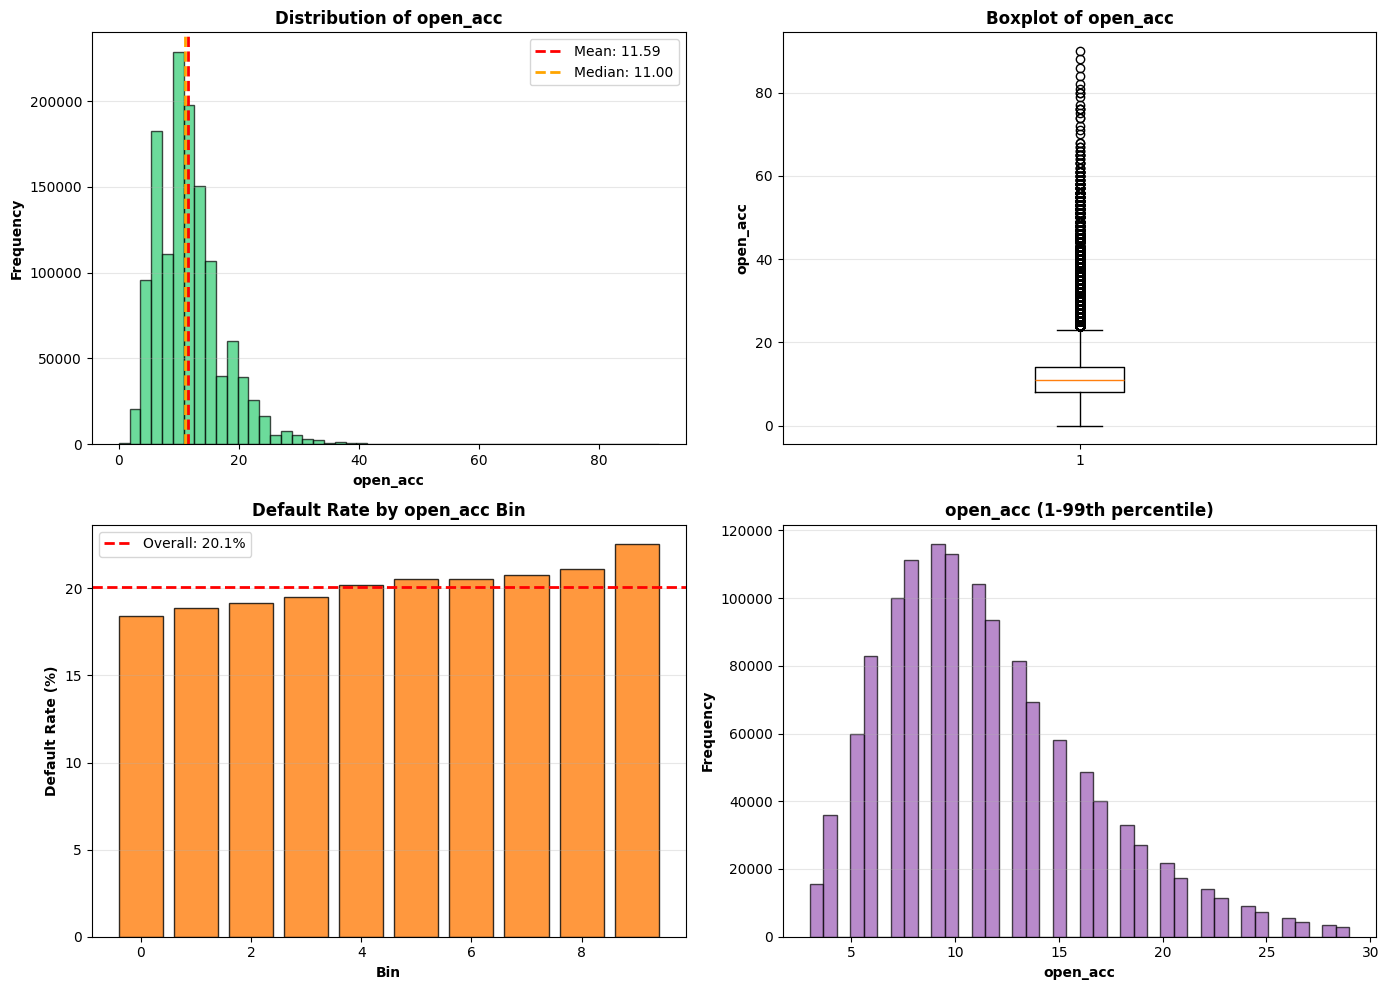

✅ Plots generated


In [50]:
from utils.eda_numerical_helpers import (
    profile_numeric_feature
)
result = profile_numeric_feature(df, 'open_acc', plot=True)

### pub_rec

2026-01-08 19:50:42.461 | INFO     | utils.eda_numerical_helpers:profile_numeric_feature:40 - Profiling numeric feature: pub_rec
2026-01-08 19:50:42.644 | SUCCESS  | utils.eda_numerical_helpers:profile_numeric_feature:170 - Profiling complete for pub_rec



NUMERIC FEATURE PROFILE: pub_rec

──────────────────────────────────────────────────────────────────────
Basic Statistics:
  Valid rows: 1,303,638 (100.00%)
  Missing: 0 (0.00%)
  Unique values: 37
  Range: [0.00, 86.00]
  Mean: 0.22, Median: 0.00
  Std Dev: 0.60, Skew: 11.74

──────────────────────────────────────────────────────────────────────
Percentiles (for capping decisions):
  p1: 0.00
  p5: 0.00
  p95: 1.00
  p99: 2.00
  p99.5: 3.00

──────────────────────────────────────────────────────────────────────
Association with Default:
  Point-biserial correlation: 0.0263
  P-value: 8.60e-199
  Information Value (IV): 0.0014
  IV Interpretation: NEGLIGIBLE

──────────────────────────────────────────────────────────────────────
Default Rate by Bin:
         _bin   count  defaults  default_rate_%
(-0.001, 1.0] 1267644    253163       19.971143
  (1.0, 86.0]   35994      8523       23.678946
  Pattern: MONOTONIC (increasing)

Generating plots...


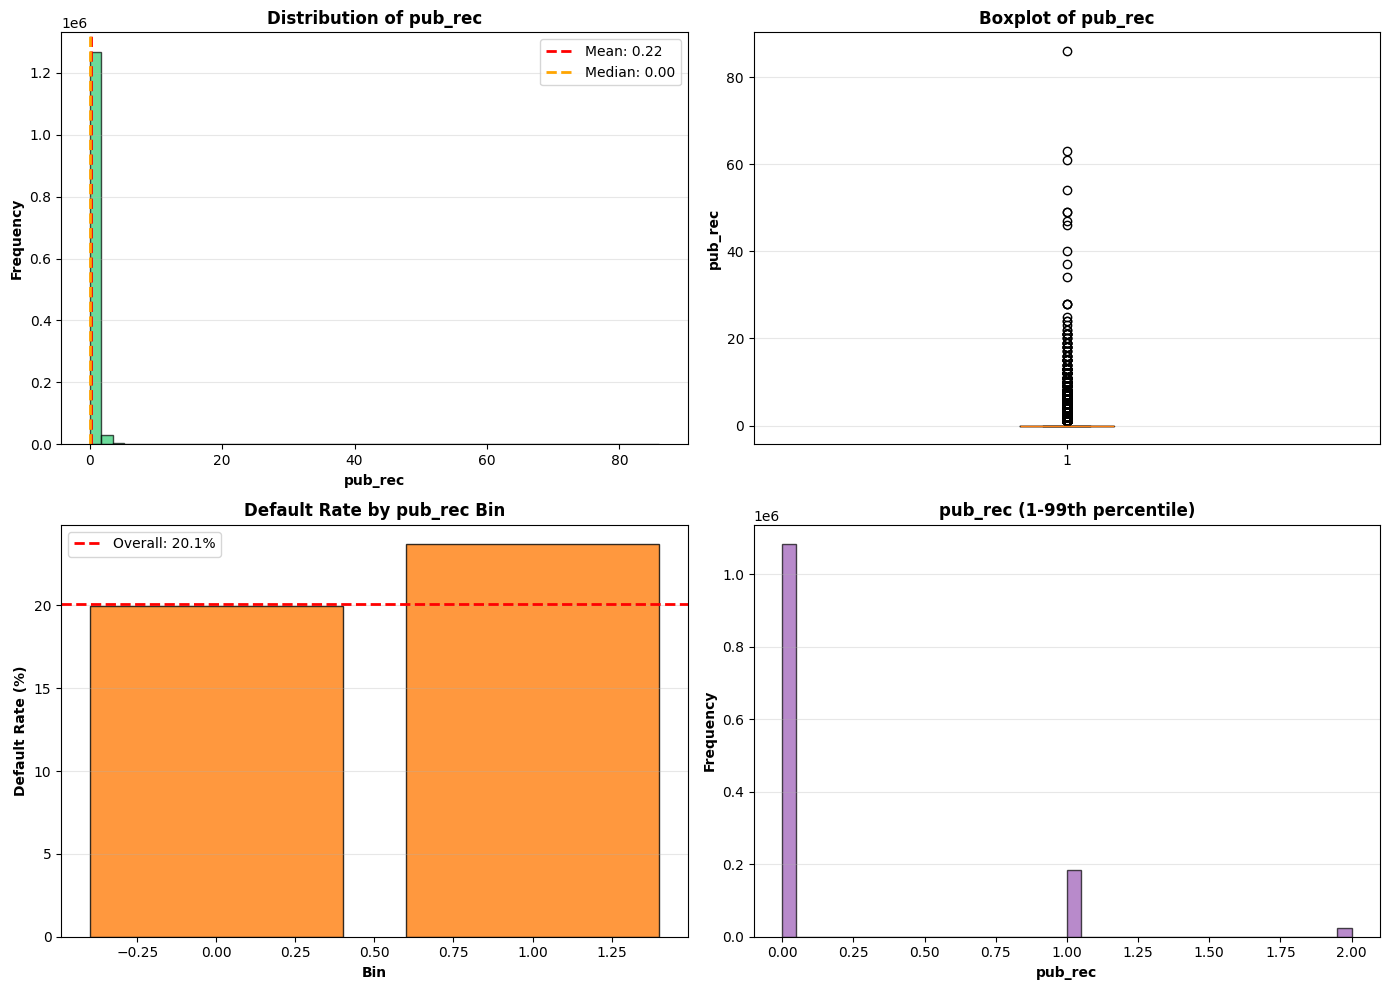

✅ Plots generated


In [57]:
from utils.eda_numerical_helpers import (
    profile_numeric_feature
)
result = profile_numeric_feature(df, 'pub_rec', plot=True)

In [62]:
# Binary: Has any public record?
df['has_pub_rec'] = (df['pub_rec'] > 0).astype(int)

# Binary: Severe public record history (2+)?
df['high_pub_rec'] = (df['pub_rec'] >= 2).astype(int)


2026-01-08 19:55:22.287 | INFO     | utils.eda_numerical_helpers:profile_numeric_feature:40 - Profiling numeric feature: has_pub_rec
2026-01-08 19:55:22.460 | SUCCESS  | utils.eda_numerical_helpers:profile_numeric_feature:170 - Profiling complete for has_pub_rec



NUMERIC FEATURE PROFILE: has_pub_rec

──────────────────────────────────────────────────────────────────────
Basic Statistics:
  Valid rows: 1,303,638 (100.00%)
  Missing: 0 (0.00%)
  Unique values: 2
  Range: [0.00, 1.00]
  Mean: 0.17, Median: 0.00
  Std Dev: 0.38, Skew: 1.76

──────────────────────────────────────────────────────────────────────
Percentiles (for capping decisions):
  p1: 0.00
  p5: 0.00
  p95: 1.00
  p99: 1.00
  p99.5: 1.00

──────────────────────────────────────────────────────────────────────
Association with Default:
  Point-biserial correlation: 0.0315
  P-value: 9.01e-284
  Information Value (IV): 0.0000
  IV Interpretation: NEGLIGIBLE

──────────────────────────────────────────────────────────────────────
Default Rate by Bin:
         _bin   count  defaults  default_rate_%
(-0.001, 1.0] 1303638    261686       20.073517
  Pattern: MONOTONIC (increasing)

Generating plots...


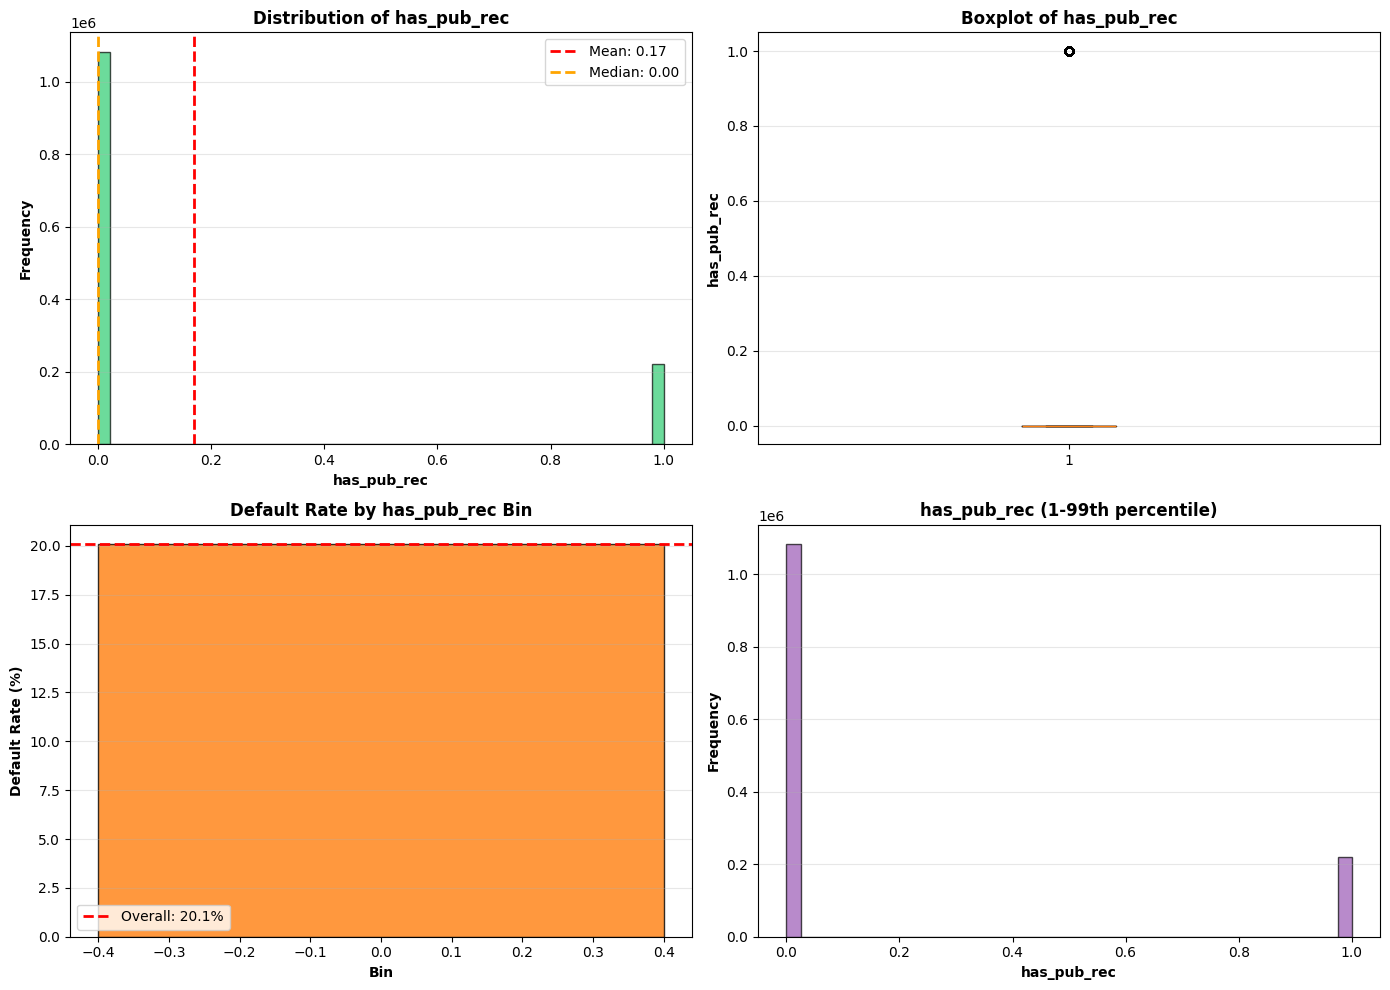

✅ Plots generated


In [63]:
from utils.eda_numerical_helpers import (
    profile_numeric_feature
)
result = profile_numeric_feature(df, 'has_pub_rec', plot=True)

2026-01-08 19:55:25.671 | INFO     | utils.eda_numerical_helpers:profile_numeric_feature:40 - Profiling numeric feature: high_pub_rec
2026-01-08 19:55:25.845 | SUCCESS  | utils.eda_numerical_helpers:profile_numeric_feature:170 - Profiling complete for high_pub_rec



NUMERIC FEATURE PROFILE: high_pub_rec

──────────────────────────────────────────────────────────────────────
Basic Statistics:
  Valid rows: 1,303,638 (100.00%)
  Missing: 0 (0.00%)
  Unique values: 2
  Range: [0.00, 1.00]
  Mean: 0.03, Median: 0.00
  Std Dev: 0.16, Skew: 5.77

──────────────────────────────────────────────────────────────────────
Percentiles (for capping decisions):
  p1: 0.00
  p5: 0.00
  p95: 0.00
  p99: 1.00
  p99.5: 1.00

──────────────────────────────────────────────────────────────────────
Association with Default:
  Point-biserial correlation: 0.0152
  P-value: 3.39e-67
  Information Value (IV): 0.0000
  IV Interpretation: NEGLIGIBLE

──────────────────────────────────────────────────────────────────────
Default Rate by Bin:
         _bin   count  defaults  default_rate_%
(-0.001, 1.0] 1303638    261686       20.073517
  Pattern: MONOTONIC (increasing)

Generating plots...


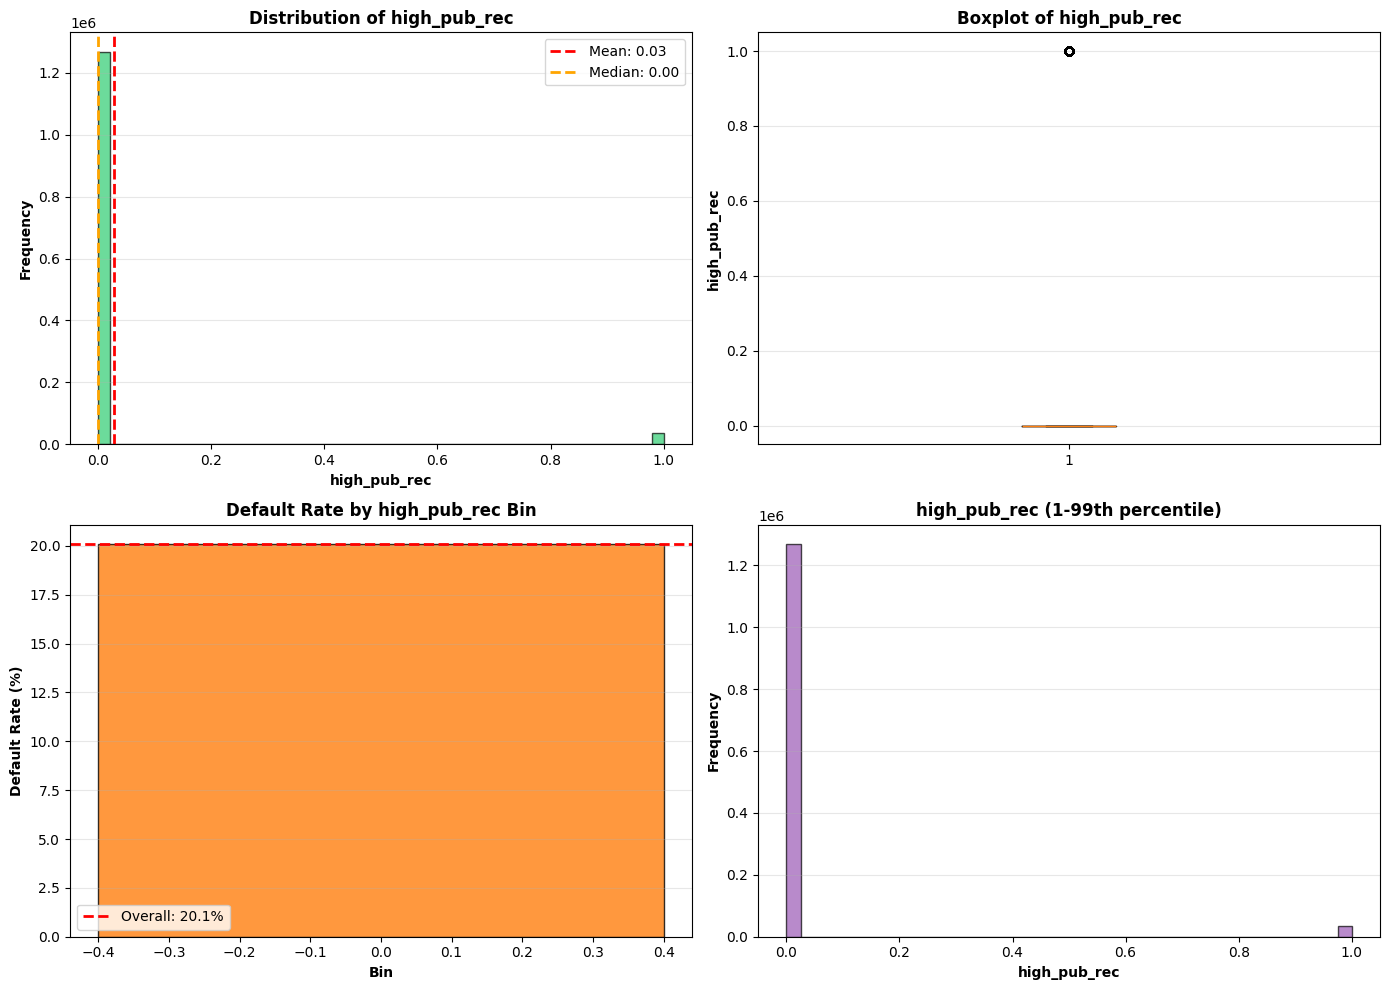

✅ Plots generated


In [64]:
from utils.eda_numerical_helpers import (
    profile_numeric_feature
)
result = profile_numeric_feature(df, 'high_pub_rec', plot=True)

### revol_bal

2026-01-08 21:34:40.973 | INFO     | utils.eda_numerical_helpers:profile_numeric_feature:40 - Profiling numeric feature: revol_bal
2026-01-08 21:34:41.190 | SUCCESS  | utils.eda_numerical_helpers:profile_numeric_feature:170 - Profiling complete for revol_bal



NUMERIC FEATURE PROFILE: revol_bal

──────────────────────────────────────────────────────────────────────
Basic Statistics:
  Valid rows: 1,303,638 (100.00%)
  Missing: 0 (0.00%)
  Unique values: 82819
  Range: [0.00, 2904836.00]
  Mean: 16235.93, Median: 11140.00
  Std Dev: 22286.13, Skew: 13.91

──────────────────────────────────────────────────────────────────────
Percentiles (for capping decisions):
  p1: 176.00
  p5: 1681.00
  p95: 43283.00
  p99: 94245.63
  p99.5: 133708.71

──────────────────────────────────────────────────────────────────────
Association with Default:
  Point-biserial correlation: -0.0196
  P-value: 9.58e-111
  Information Value (IV): 0.0035
  IV Interpretation: NEGLIGIBLE

──────────────────────────────────────────────────────────────────────
Default Rate by Bin:
                _bin  count  defaults  default_rate_%
    (-0.001, 3030.0] 130394     25803       19.788487
    (3030.0, 5028.0] 130384     25895       19.860566
    (5028.0, 6891.0] 130332     2608

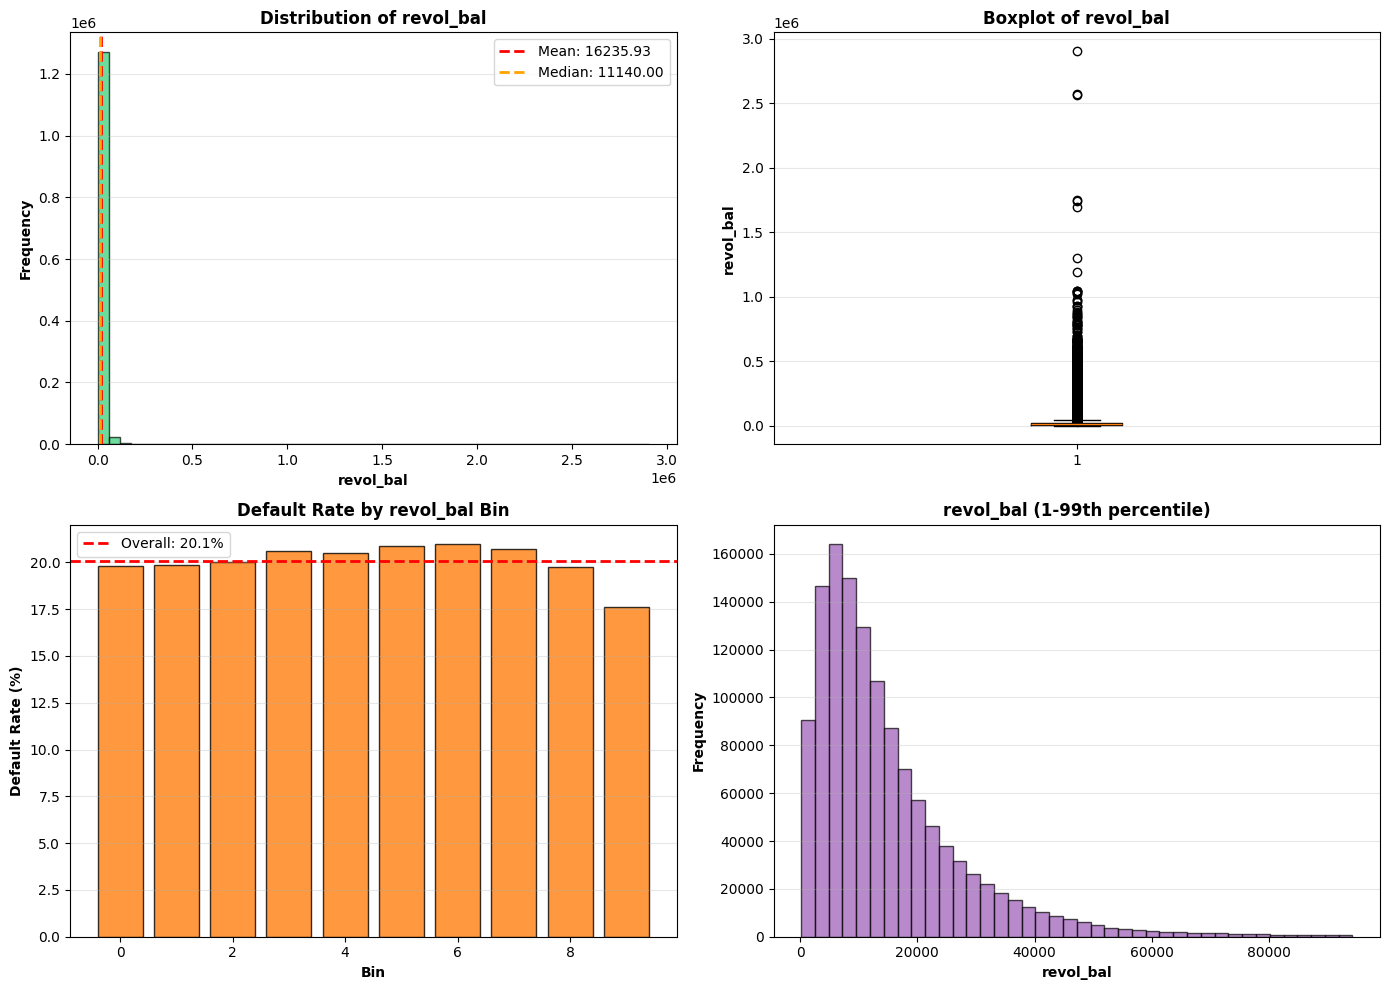

✅ Plots generated


In [67]:
from utils.eda_numerical_helpers import (
    profile_numeric_feature
)
result = profile_numeric_feature(df, 'revol_bal', plot=True)


2026-01-08 21:42:34.992 | INFO     | utils.eda_numerical_helpers:profile_numeric_feature:40 - Profiling numeric feature: revol_bal_to_income
2026-01-08 21:42:35.261 | SUCCESS  | utils.eda_numerical_helpers:profile_numeric_feature:170 - Profiling complete for revol_bal_to_income



NUMERIC FEATURE PROFILE: revol_bal_to_income

──────────────────────────────────────────────────────────────────────
Basic Statistics:
  Valid rows: 1,303,638 (100.00%)
  Missing: 0 (0.00%)
  Unique values: 1037371
  Range: [0.00, 181809.00]
  Mean: 3.51, Median: 0.18
  Std Dev: 343.73, Skew: 229.98

──────────────────────────────────────────────────────────────────────
Percentiles (for capping decisions):
  p1: 0.00
  p5: 0.03
  p95: 0.56
  p99: 0.95
  p99.5: 1.25

──────────────────────────────────────────────────────────────────────
Association with Default:
  Point-biserial correlation: -0.0000
  P-value: 9.63e-01
  Information Value (IV): 0.0083
  IV Interpretation: NEGLIGIBLE

──────────────────────────────────────────────────────────────────────
Default Rate by Bin:
             _bin  count  defaults  default_rate_%
 (-0.001, 0.0483] 130365     24362       18.687531
 (0.0483, 0.0828] 130364     24153       18.527354
  (0.0828, 0.114] 130363     24292       18.634122
   (0.114, 

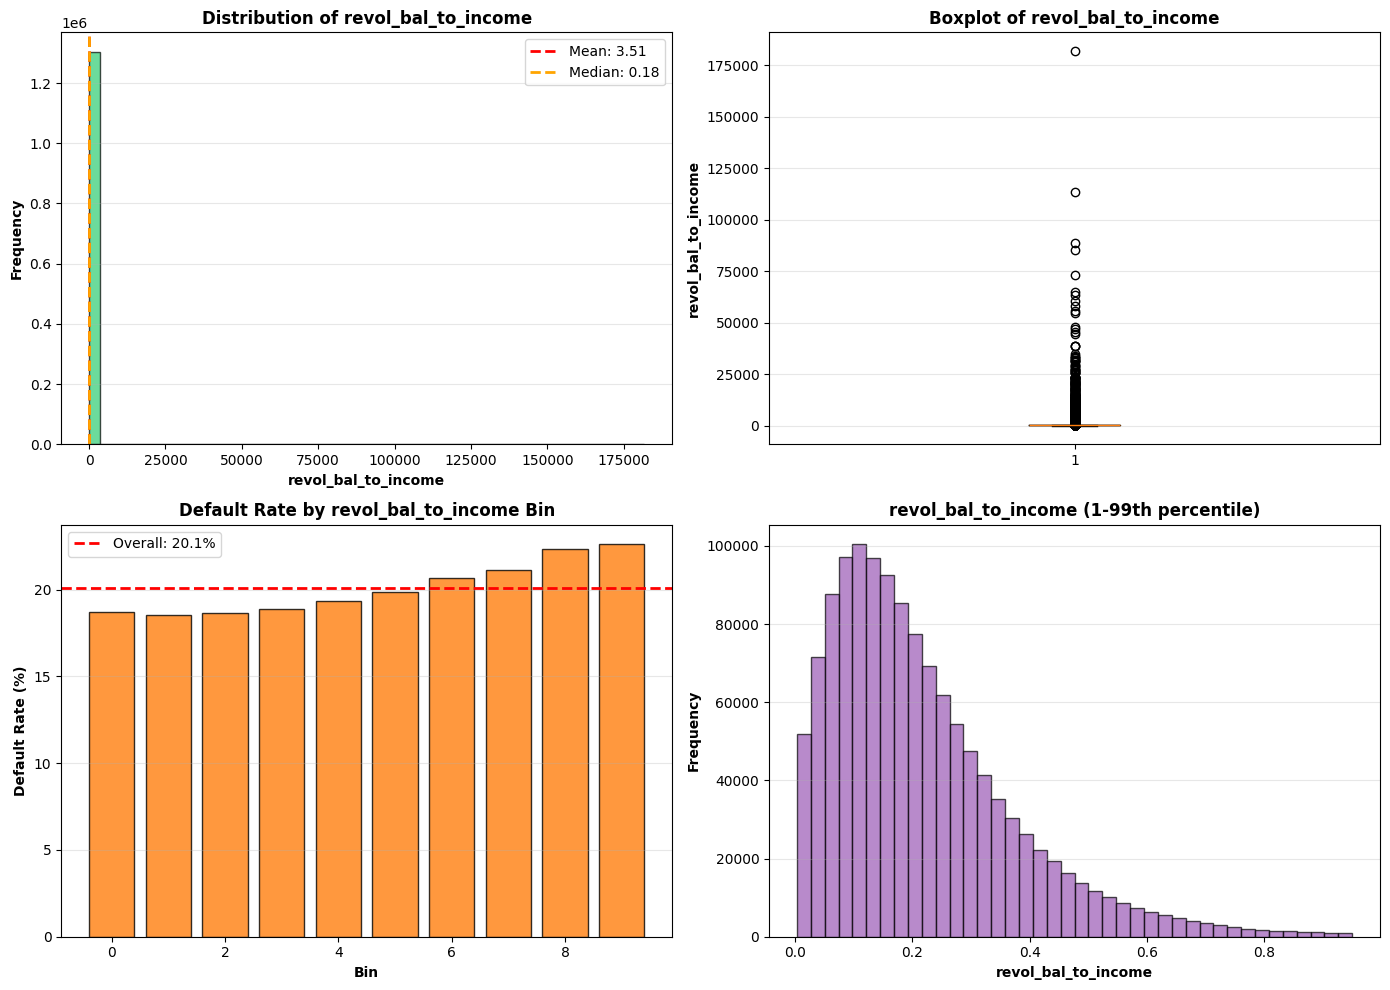

✅ Plots generated


In [68]:
df['revol_bal_to_income'] = df['revol_bal'] / (df['annual_inc'] + 1)
from utils.eda_numerical_helpers import (
    profile_numeric_feature
)
result = profile_numeric_feature(df, 'revol_bal_to_income', plot=True)


### revol_util

2026-01-08 21:49:33.881 | INFO     | utils.eda_numerical_helpers:profile_numeric_feature:40 - Profiling numeric feature: revol_util
2026-01-08 21:49:34.180 | SUCCESS  | utils.eda_numerical_helpers:profile_numeric_feature:170 - Profiling complete for revol_util



NUMERIC FEATURE PROFILE: revol_util

──────────────────────────────────────────────────────────────────────
Basic Statistics:
  Valid rows: 1,302,828 (99.94%)
  Missing: 810 (0.06%)
  Unique values: 1363
  Range: [0.00, 892.30]
  Mean: 51.91, Median: 52.30
  Std Dev: 24.50, Skew: -0.04

──────────────────────────────────────────────────────────────────────
Percentiles (for capping decisions):
  p1: 1.10
  p5: 10.50
  p95: 91.50
  p99: 98.20
  p99.5: 99.50

──────────────────────────────────────────────────────────────────────
Association with Default:
  Point-biserial correlation: 0.0611
  P-value: 0.00e+00
  Information Value (IV): 0.0260
  IV Interpretation: WEAK

──────────────────────────────────────────────────────────────────────
Default Rate by Bin:
          _bin  count  defaults  default_rate_%
(-0.001, 18.3] 130748     19294       14.756631
  (18.3, 29.2] 130446     22039       16.895114
  (29.2, 37.6] 130993     24253       18.514730
  (37.6, 45.1] 129525     25515       19

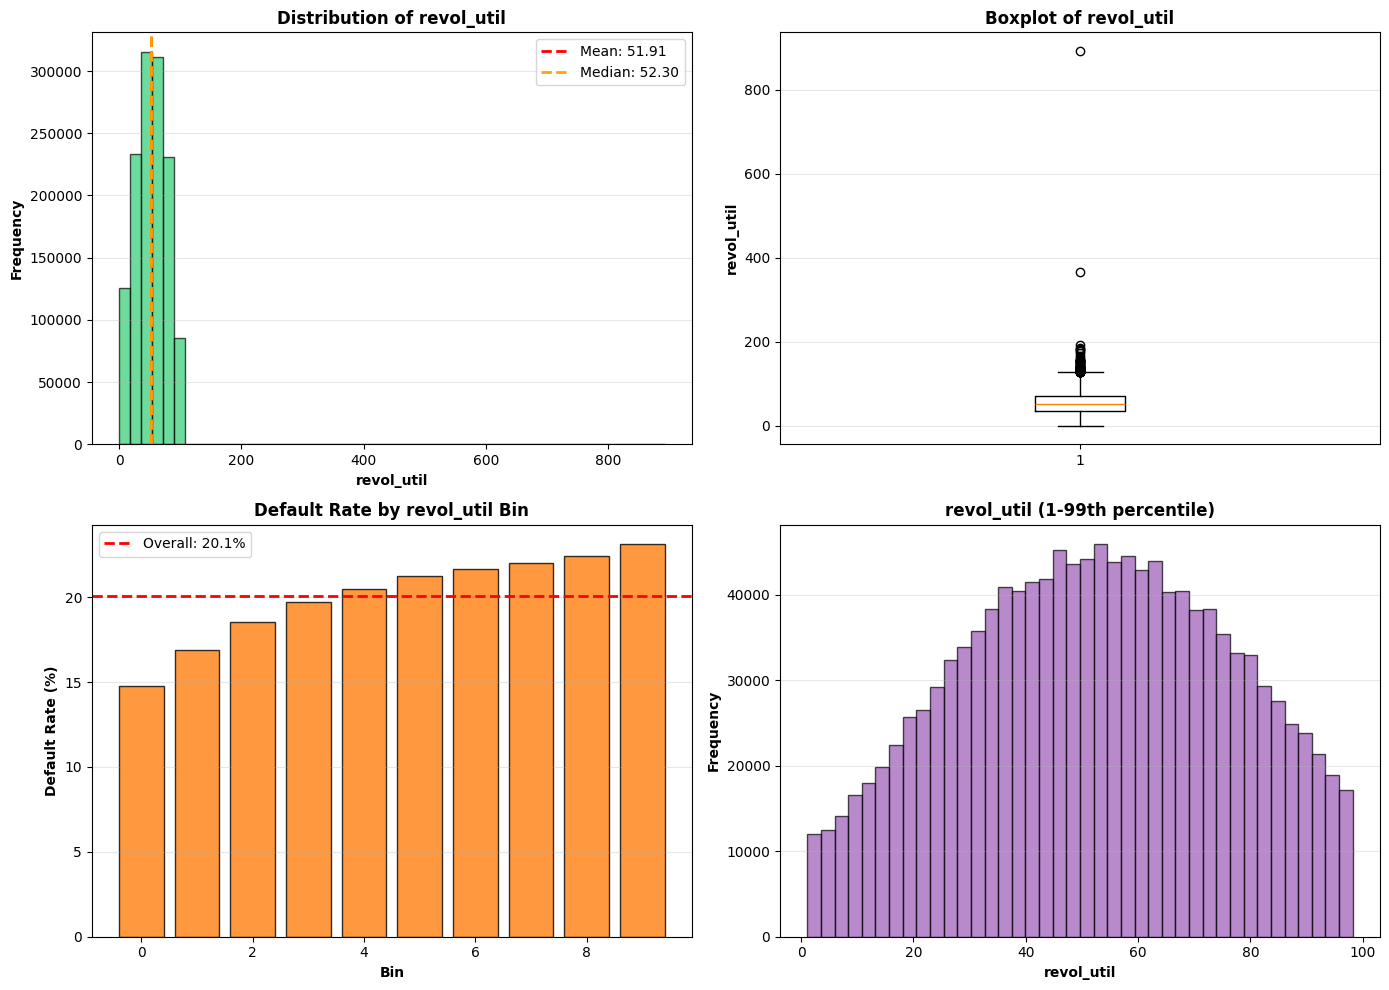

✅ Plots generated


In [70]:

from utils.eda_numerical_helpers import (
    profile_numeric_feature
)
result = profile_numeric_feature(df, 'revol_util', plot=True)


2026-01-08 22:08:56.751 | INFO     | utils.eda_numerical_helpers:profile_numeric_feature:40 - Profiling numeric feature: high_revol_util
2026-01-08 22:08:56.894 | SUCCESS  | utils.eda_numerical_helpers:profile_numeric_feature:170 - Profiling complete for high_revol_util



NUMERIC FEATURE PROFILE: high_revol_util

──────────────────────────────────────────────────────────────────────
Basic Statistics:
  Valid rows: 1,303,638 (100.00%)
  Missing: 0 (0.00%)
  Unique values: 2
  Range: [0.00, 1.00]
  Mean: 0.67, Median: 1.00
  Std Dev: 0.47, Skew: -0.72

──────────────────────────────────────────────────────────────────────
Percentiles (for capping decisions):
  p1: 0.00
  p5: 0.00
  p95: 1.00
  p99: 1.00
  p99.5: 1.00

──────────────────────────────────────────────────────────────────────
Association with Default:
  Point-biserial correlation: 0.0546
  P-value: 0.00e+00
  Information Value (IV): 0.0000
  IV Interpretation: NEGLIGIBLE

──────────────────────────────────────────────────────────────────────
Default Rate by Bin:
         _bin   count  defaults  default_rate_%
(-0.001, 1.0] 1303638    261686       20.073517
  Pattern: MONOTONIC (increasing)

Generating plots...


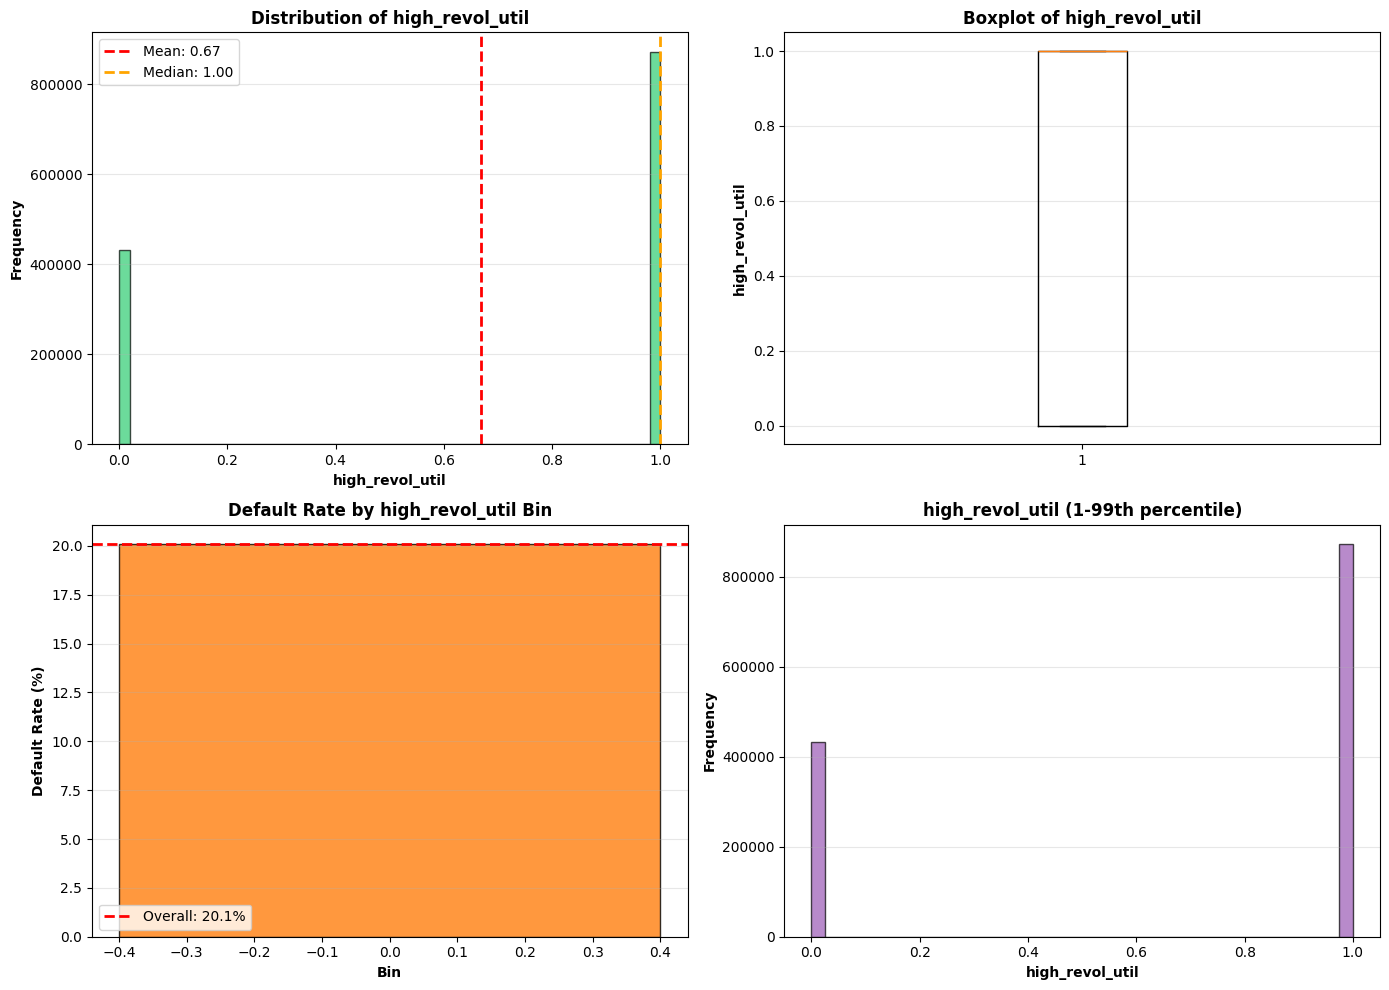

✅ Plots generated


In [76]:
# High utilization flag
df['high_revol_util'] = (df['revol_util'] >= 40).astype(int)
from utils.eda_numerical_helpers import (
    profile_numeric_feature
)
result = profile_numeric_feature(df, 'high_revol_util', plot=True)


2026-01-08 22:04:00.352 | INFO     | utils.eda_numerical_helpers:profile_numeric_feature:40 - Profiling numeric feature: revol_util_tier
2026-01-08 22:04:00.514 | SUCCESS  | utils.eda_numerical_helpers:profile_numeric_feature:170 - Profiling complete for revol_util_tier



NUMERIC FEATURE PROFILE: revol_util_tier

──────────────────────────────────────────────────────────────────────
Basic Statistics:
  Valid rows: 1,303,638 (100.00%)
  Missing: 0 (0.00%)
  Unique values: 5
  Range: [-1.00, 3.00]
  Mean: 1.22, Median: 1.00
  Std Dev: 0.87, Skew: -0.00

──────────────────────────────────────────────────────────────────────
Percentiles (for capping decisions):
  p1: 0.00
  p5: 0.00
  p95: 3.00
  p99: 3.00
  p99.5: 3.00

──────────────────────────────────────────────────────────────────────
Association with Default:
  Point-biserial correlation: 0.0540
  P-value: 0.00e+00
  Information Value (IV): 0.0214
  IV Interpretation: WEAK

──────────────────────────────────────────────────────────────────────
Default Rate by Bin:
         _bin  count  defaults  default_rate_%
(-1.001, 0.0] 278130     44815       16.112969
   (0.0, 1.0] 521367    104558       20.054587
   (1.0, 2.0] 430412     95149       22.106493
   (2.0, 3.0]  73729     17164       23.279849
  Pa

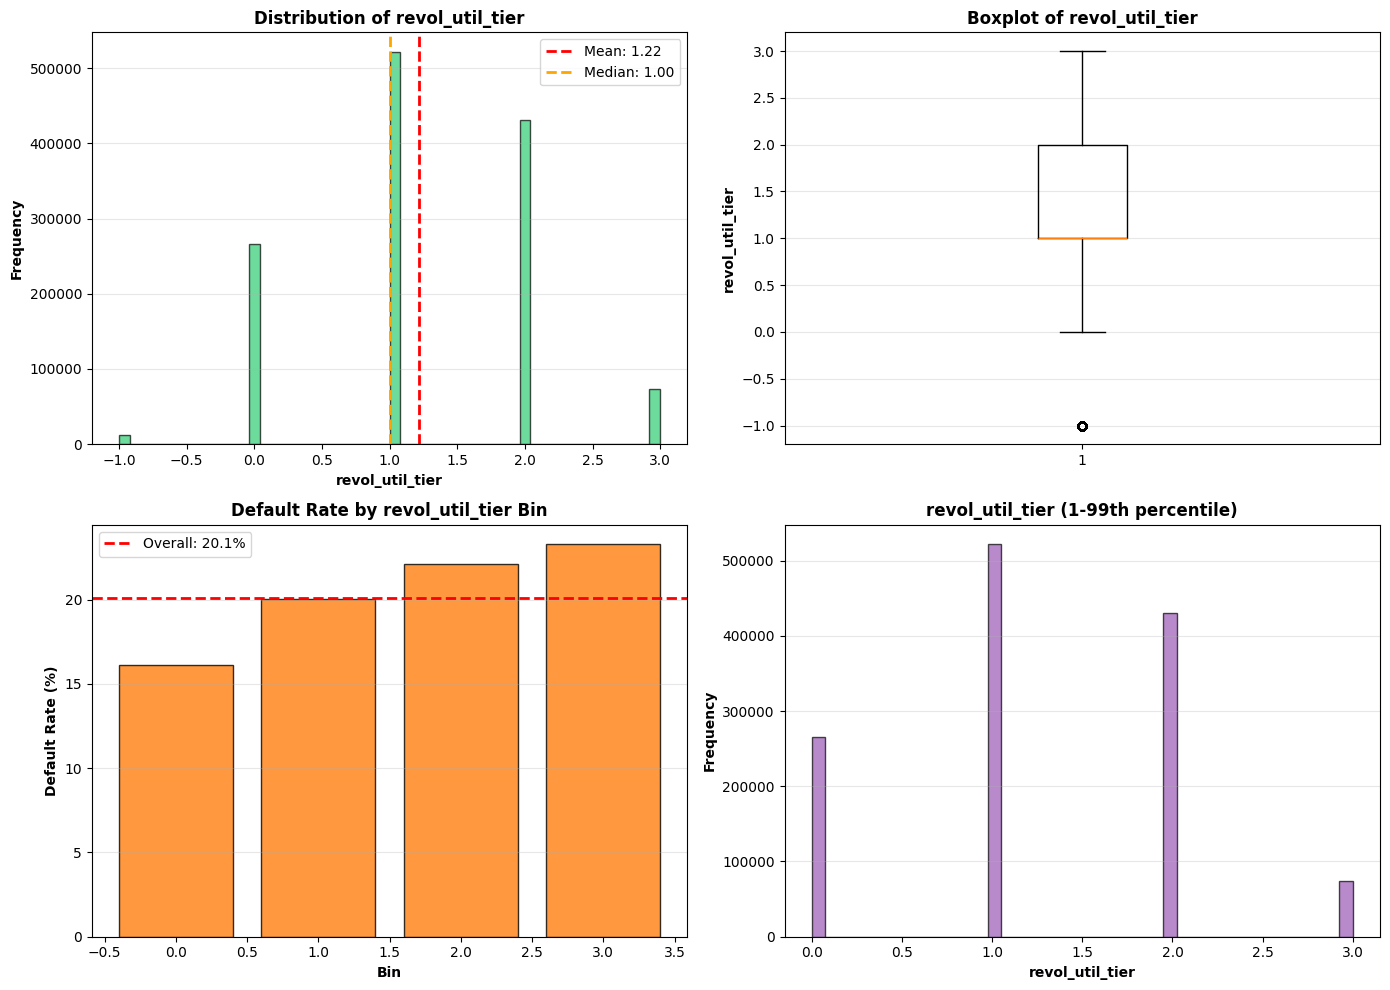

✅ Plots generated


In [72]:
#  Utilization tiers 
df['revol_util_tier'] = pd.cut(df['revol_util'], 
                                bins=[0, 30, 60, 90, 100], 
                                labels=['low', 'medium', 'high', 'maxed'])
df['revol_util_tier'] = df['revol_util_tier'].cat.codes  # numeric: 0,1,2,3
from utils.eda_numerical_helpers import (
    profile_numeric_feature
)
result = profile_numeric_feature(df, 'revol_util_tier', plot=True)

2026-01-08 22:05:30.247 | INFO     | utils.eda_numerical_helpers:profile_numeric_feature:40 - Profiling numeric feature: revol_stress_score
2026-01-08 22:05:30.516 | SUCCESS  | utils.eda_numerical_helpers:profile_numeric_feature:170 - Profiling complete for revol_stress_score



NUMERIC FEATURE PROFILE: revol_stress_score

──────────────────────────────────────────────────────────────────────
Basic Statistics:
  Valid rows: 1,302,828 (99.94%)
  Missing: 810 (0.06%)
  Unique values: 18203
  Range: [0.00, 597.36]
  Mean: 58.31, Median: 52.26
  Std Dev: 36.99, Skew: 1.22

──────────────────────────────────────────────────────────────────────
Percentiles (for capping decisions):
  p1: 0.90
  p5: 9.52
  p95: 126.90
  p99: 175.23
  p99.5: 196.00

──────────────────────────────────────────────────────────────────────
Association with Default:
  Point-biserial correlation: 0.0708
  P-value: 0.00e+00
  Information Value (IV): 0.0338
  IV Interpretation: WEAK

──────────────────────────────────────────────────────────────────────
Default Rate by Bin:
            _bin  count  defaults  default_rate_%
  (-0.001, 17.1] 130359     19637       15.063785
   (17.1, 27.72] 130592     21465       16.436688
  (27.72, 36.26] 130010     23133       17.793247
  (36.26, 44.25] 13017

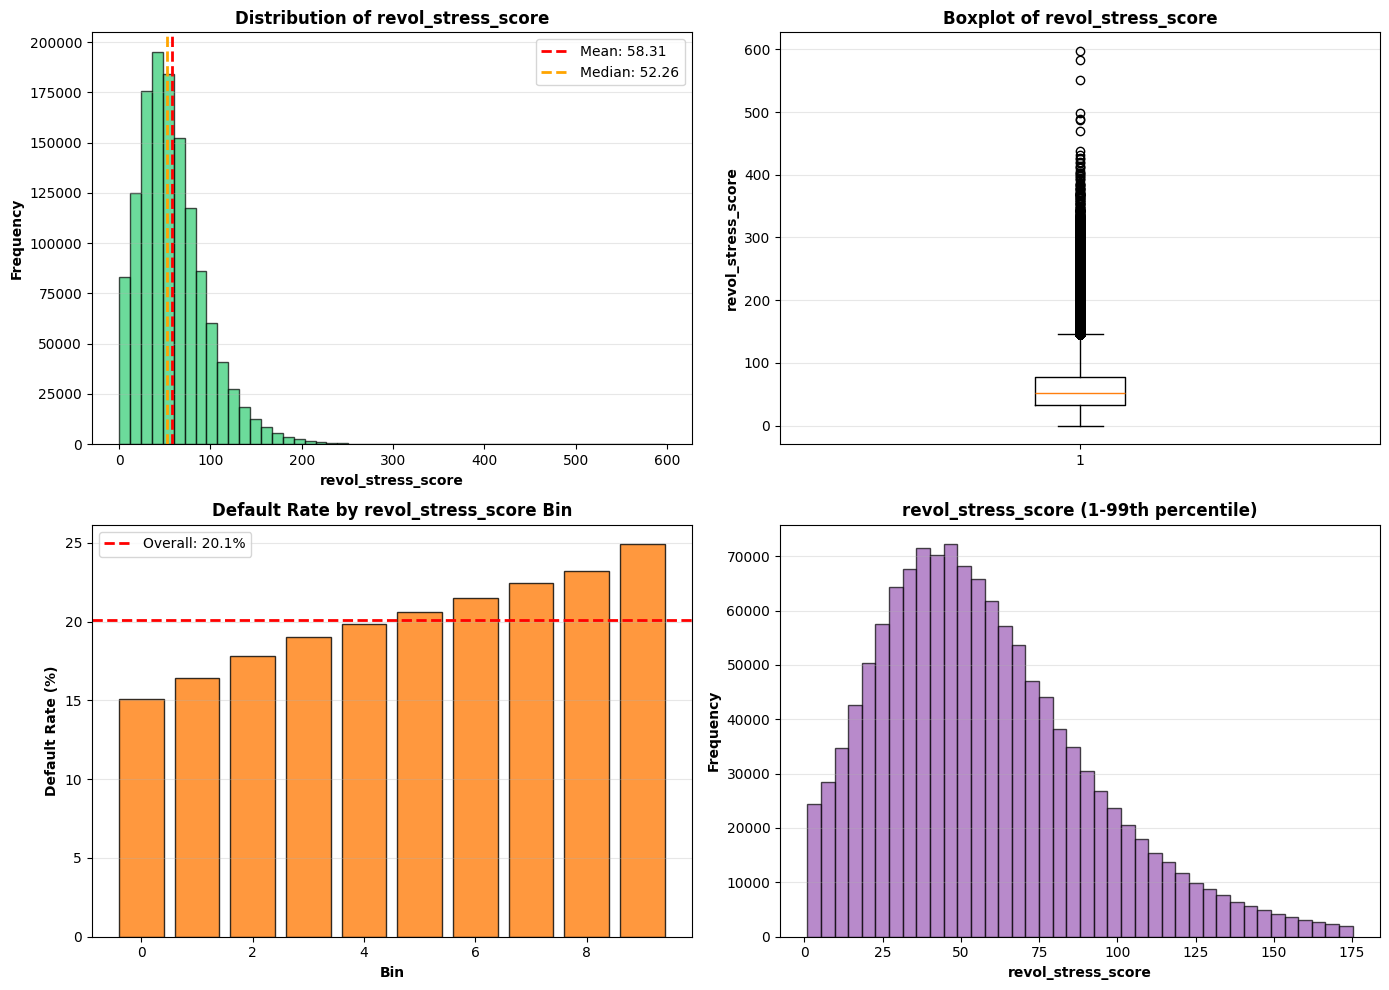

✅ Plots generated


In [73]:
# Combine with open_acc (interaction term)
# High utilization on many accounts is worse than high utilization on one account:

df['revol_stress_score'] = df['revol_util'] * (df['open_acc'] / 10)
from utils.eda_numerical_helpers import (
    profile_numeric_feature
)
result = profile_numeric_feature(df, 'revol_stress_score', plot=True)


### total_acc

2026-01-08 22:17:28.974 | INFO     | utils.eda_numerical_helpers:profile_numeric_feature:40 - Profiling numeric feature: total_acc
2026-01-08 22:17:29.242 | SUCCESS  | utils.eda_numerical_helpers:profile_numeric_feature:170 - Profiling complete for total_acc



NUMERIC FEATURE PROFILE: total_acc

──────────────────────────────────────────────────────────────────────
Basic Statistics:
  Valid rows: 1,303,638 (100.00%)
  Missing: 0 (0.00%)
  Unique values: 142
  Range: [2.00, 176.00]
  Mean: 25.02, Median: 23.00
  Std Dev: 12.00, Skew: 0.96

──────────────────────────────────────────────────────────────────────
Percentiles (for capping decisions):
  p1: 5.00
  p5: 9.00
  p95: 47.00
  p99: 61.00
  p99.5: 65.00

──────────────────────────────────────────────────────────────────────
Association with Default:
  Point-biserial correlation: -0.0113
  P-value: 2.48e-38
  Information Value (IV): 0.0017
  IV Interpretation: NEGLIGIBLE

──────────────────────────────────────────────────────────────────────
Default Rate by Bin:
         _bin  count  defaults  default_rate_%
(1.999, 11.0] 139726     29709       21.262328
 (11.0, 15.0] 153073     32248       21.067073
 (15.0, 18.0] 135309     27615       20.408842
 (18.0, 20.0]  93703     18903       20.17

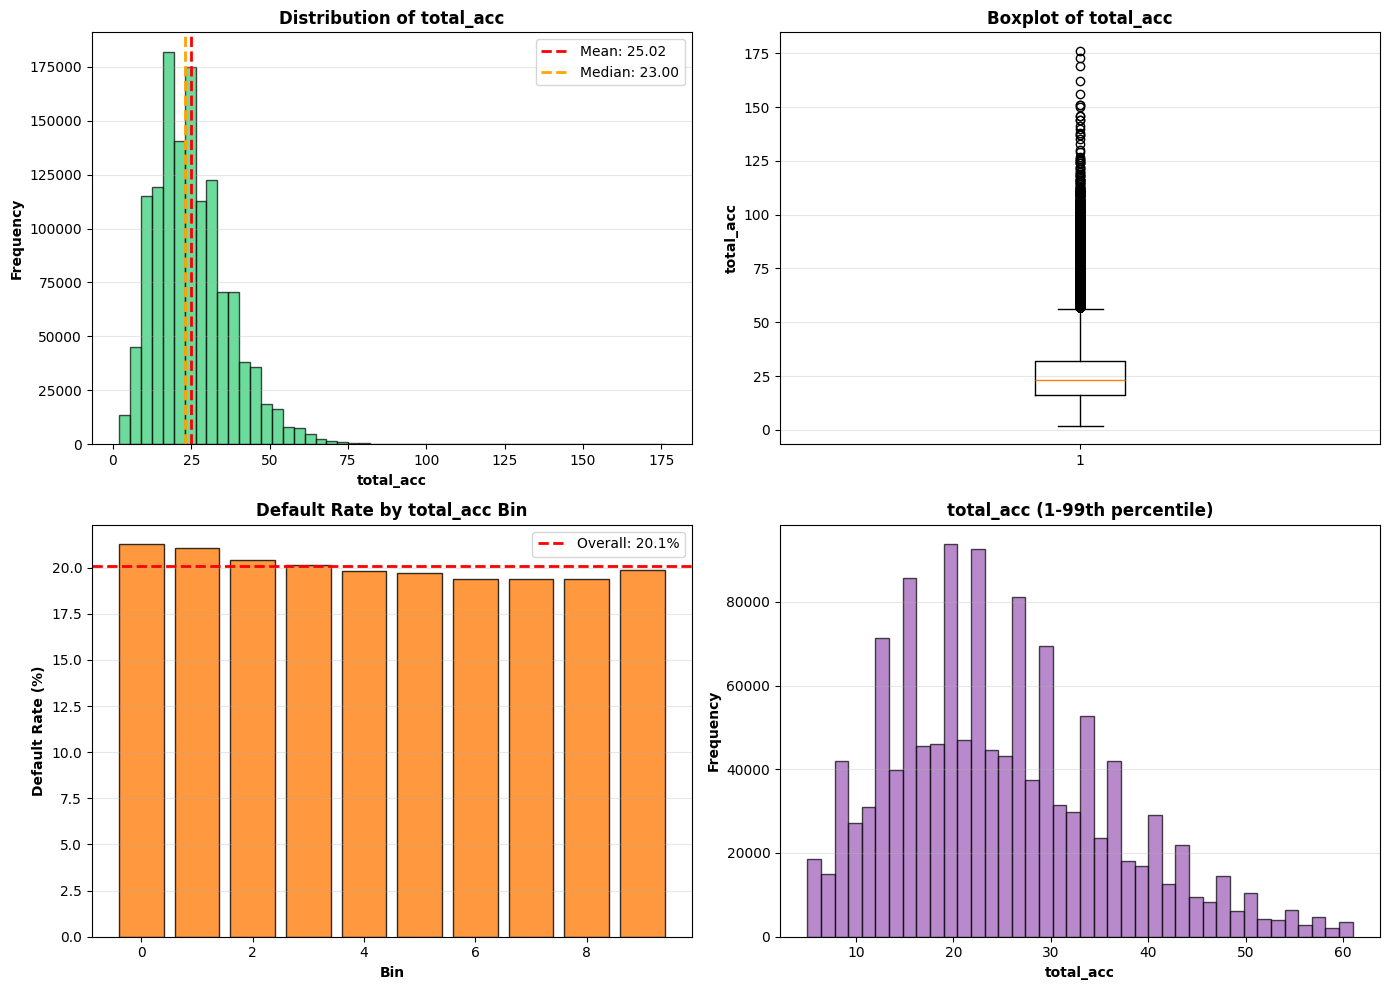

✅ Plots generated


In [78]:

from utils.eda_numerical_helpers import (
    profile_numeric_feature
)
result = profile_numeric_feature(df, 'total_acc', plot=True)

### collections_12_mths_ex_med

2026-01-08 22:57:50.480 | INFO     | utils.eda_numerical_helpers:profile_numeric_feature:40 - Profiling numeric feature: collections_12_mths_ex_med
2026-01-08 22:57:50.681 | SUCCESS  | utils.eda_numerical_helpers:profile_numeric_feature:170 - Profiling complete for collections_12_mths_ex_med



NUMERIC FEATURE PROFILE: collections_12_mths_ex_med

──────────────────────────────────────────────────────────────────────
Basic Statistics:
  Valid rows: 1,303,582 (100.00%)
  Missing: 56 (0.00%)
  Unique values: 15
  Range: [0.00, 20.00]
  Mean: 0.02, Median: 0.00
  Std Dev: 0.15, Skew: 15.16

──────────────────────────────────────────────────────────────────────
Percentiles (for capping decisions):
  p1: 0.00
  p5: 0.00
  p95: 0.00
  p99: 1.00
  p99.5: 1.00

──────────────────────────────────────────────────────────────────────
Association with Default:
  Point-biserial correlation: 0.0161
  P-value: 2.01e-75
  Information Value (IV): 0.0000
  IV Interpretation: NEGLIGIBLE

──────────────────────────────────────────────────────────────────────
Default Rate by Bin:
          _bin   count  defaults  default_rate_%
(-0.001, 20.0] 1303582    261680       20.073919
  Pattern: MONOTONIC (increasing)

Generating plots...


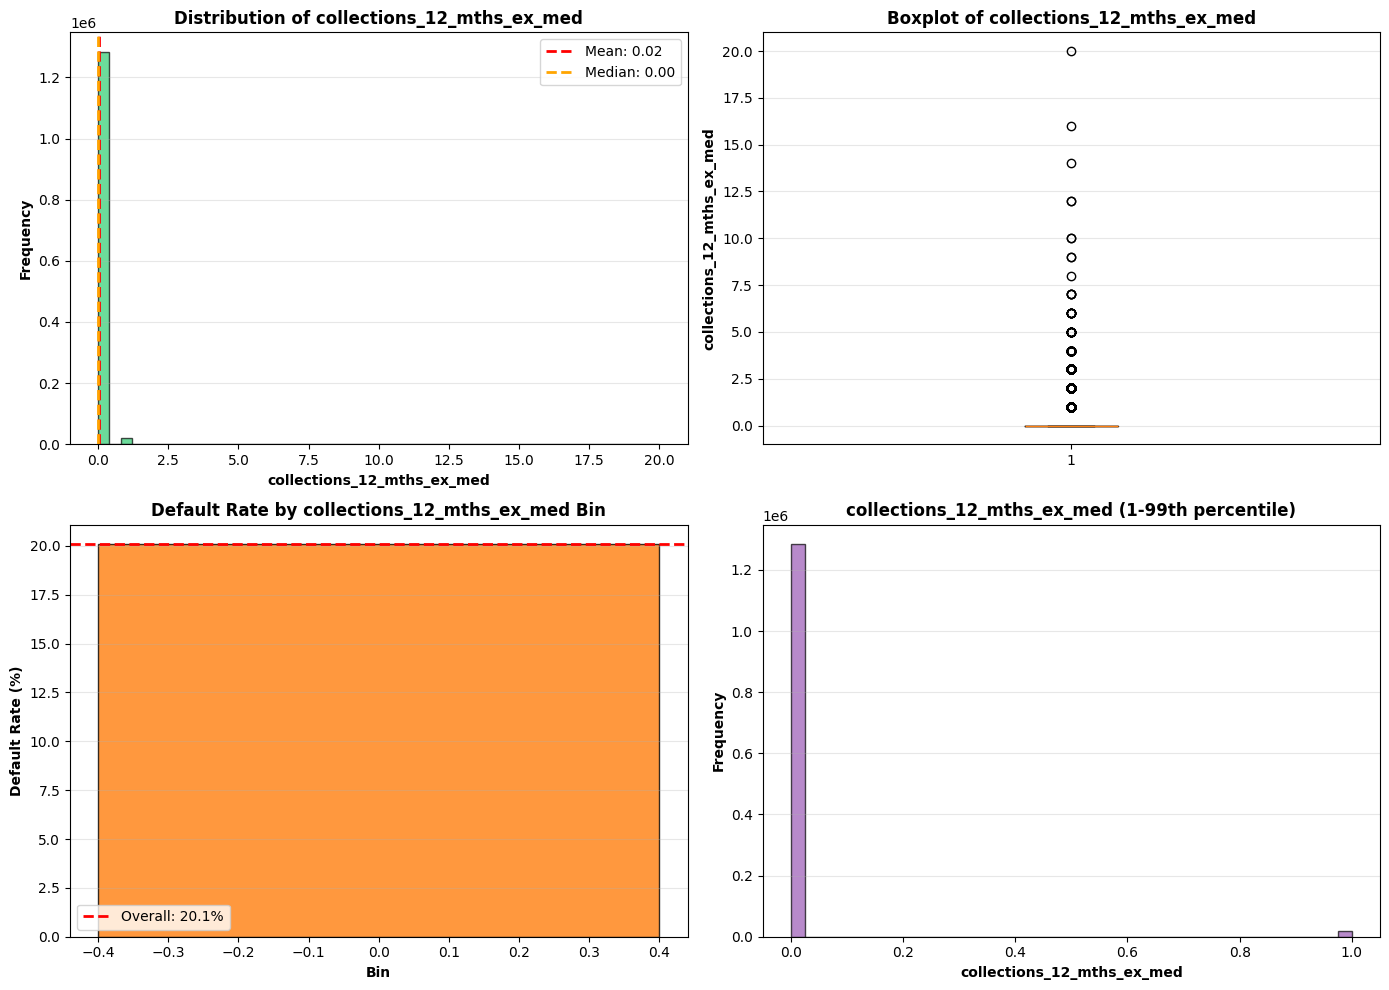

✅ Plots generated


In [ ]:

from utils.eda_numerical_helpers import (
    profile_numeric_feature
)
result = profile_numeric_feature(df, 'collections_12_mths_ex_med', plot=True)

## mths_since_last_major_derog

2026-01-08 23:06:07.722 | INFO     | utils.eda_numerical_helpers:profile_numeric_feature:40 - Profiling numeric feature: mths_since_last_major_derog
2026-01-08 23:06:07.831 | SUCCESS  | utils.eda_numerical_helpers:profile_numeric_feature:170 - Profiling complete for mths_since_last_major_derog



NUMERIC FEATURE PROFILE: mths_since_last_major_derog

──────────────────────────────────────────────────────────────────────
Basic Statistics:
  Valid rows: 342,379 (26.26%)
  Missing: 961,259 (73.74%)
  Unique values: 173
  Range: [0.00, 226.00]
  Mean: 43.69, Median: 44.00
  Std Dev: 21.37, Skew: 0.06

──────────────────────────────────────────────────────────────────────
Percentiles (for capping decisions):
  p1: 3.00
  p5: 9.00
  p95: 77.00
  p99: 82.00
  p99.5: 89.00

──────────────────────────────────────────────────────────────────────
Association with Default:
  Point-biserial correlation: -0.0067
  P-value: 8.14e-05
  Information Value (IV): 0.0010
  IV Interpretation: NEGLIGIBLE

──────────────────────────────────────────────────────────────────────
Default Rate by Bin:
          _bin  count  defaults  default_rate_%
(-0.001, 14.0]  34463      8084       23.457041
  (14.0, 23.0]  36254      8072       22.265129
  (23.0, 30.0]  33676      7389       21.941442
  (30.0, 37.0]  

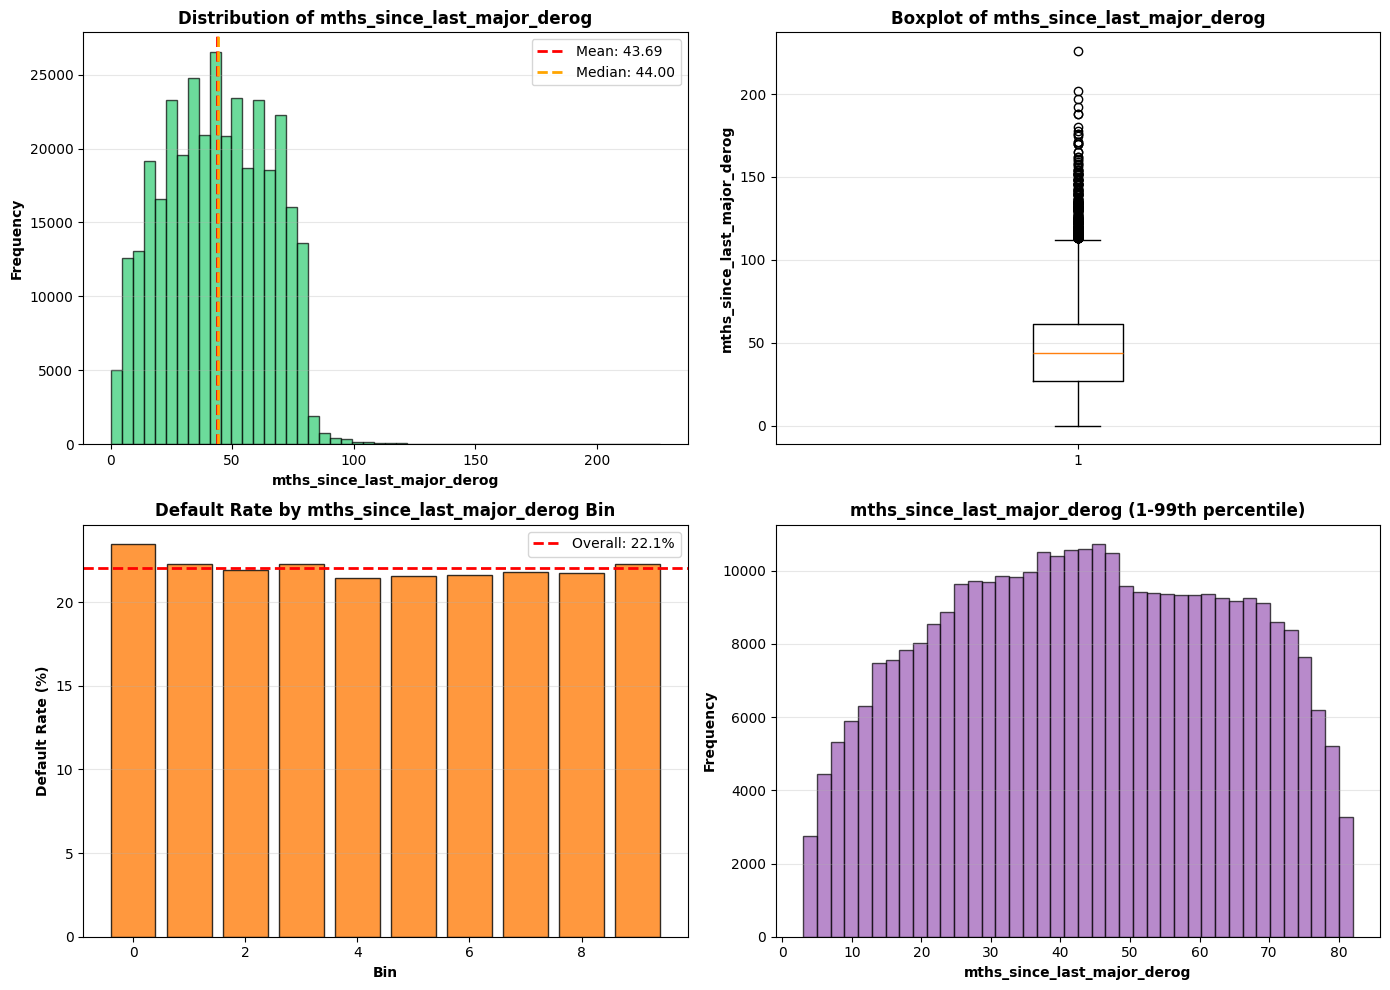

✅ Plots generated


In [83]:

from utils.eda_numerical_helpers import (
    profile_numeric_feature
)
result = profile_numeric_feature(df, 'mths_since_last_major_derog', plot=True)



### acc_now_delinq

2026-01-08 23:09:15.564 | INFO     | utils.eda_numerical_helpers:profile_numeric_feature:40 - Profiling numeric feature: acc_now_delinq
2026-01-08 23:09:15.746 | SUCCESS  | utils.eda_numerical_helpers:profile_numeric_feature:170 - Profiling complete for acc_now_delinq



NUMERIC FEATURE PROFILE: acc_now_delinq

──────────────────────────────────────────────────────────────────────
Basic Statistics:
  Valid rows: 1,303,638 (100.00%)
  Missing: 0 (0.00%)
  Unique values: 8
  Range: [0.00, 14.00]
  Mean: 0.01, Median: 0.00
  Std Dev: 0.08, Skew: 21.78

──────────────────────────────────────────────────────────────────────
Percentiles (for capping decisions):
  p1: 0.00
  p5: 0.00
  p95: 0.00
  p99: 0.00
  p99.5: 0.00

──────────────────────────────────────────────────────────────────────
Association with Default:
  Point-biserial correlation: 0.0041
  P-value: 3.02e-06
  Information Value (IV): 0.0000
  IV Interpretation: NEGLIGIBLE

──────────────────────────────────────────────────────────────────────
Default Rate by Bin:
          _bin   count  defaults  default_rate_%
(-0.001, 14.0] 1303638    261686       20.073517
  Pattern: MONOTONIC (increasing)

Generating plots...


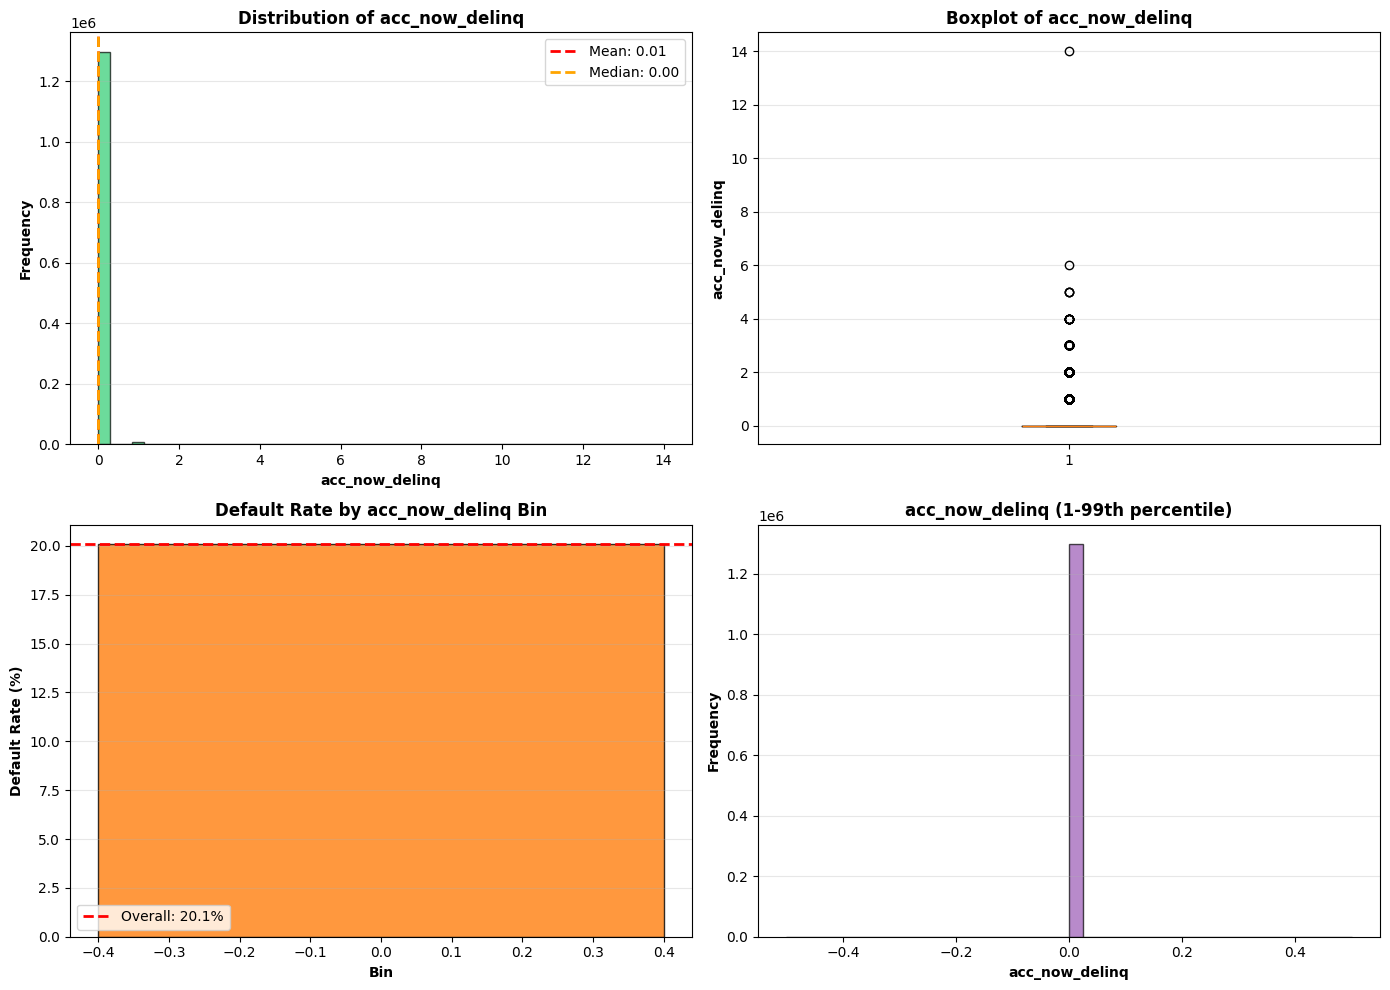

✅ Plots generated


In [85]:
from utils.eda_numerical_helpers import (
    profile_numeric_feature
)
result = profile_numeric_feature(df, 'acc_now_delinq', plot=True)

### tot_coll_amt

2026-01-08 23:17:13.276 | INFO     | utils.eda_numerical_helpers:profile_numeric_feature:40 - Profiling numeric feature: tot_coll_amt
2026-01-08 23:17:13.482 | SUCCESS  | utils.eda_numerical_helpers:profile_numeric_feature:170 - Profiling complete for tot_coll_amt



NUMERIC FEATURE PROFILE: tot_coll_amt

──────────────────────────────────────────────────────────────────────
Basic Statistics:
  Valid rows: 1,236,111 (94.82%)
  Missing: 67,527 (5.18%)
  Unique values: 12701
  Range: [0.00, 9152545.00]
  Mean: 249.43, Median: 0.00
  Std Dev: 11243.35, Skew: 656.50

──────────────────────────────────────────────────────────────────────
Percentiles (for capping decisions):
  p1: 0.00
  p5: 0.00
  p95: 772.00
  p99: 4933.90
  p99.5: 8908.90

──────────────────────────────────────────────────────────────────────
Association with Default:
  Point-biserial correlation: -0.0005
  P-value: 6.06e-01
  Information Value (IV): 0.0015
  IV Interpretation: NEGLIGIBLE

──────────────────────────────────────────────────────────────────────
Default Rate by Bin:
              _bin   count  defaults  default_rate_%
   (-0.001, 210.0] 1112547    223864       20.121757
(210.0, 9152545.0]  123564     27504       22.258910
  Pattern: MONOTONIC (increasing)

Generating pl

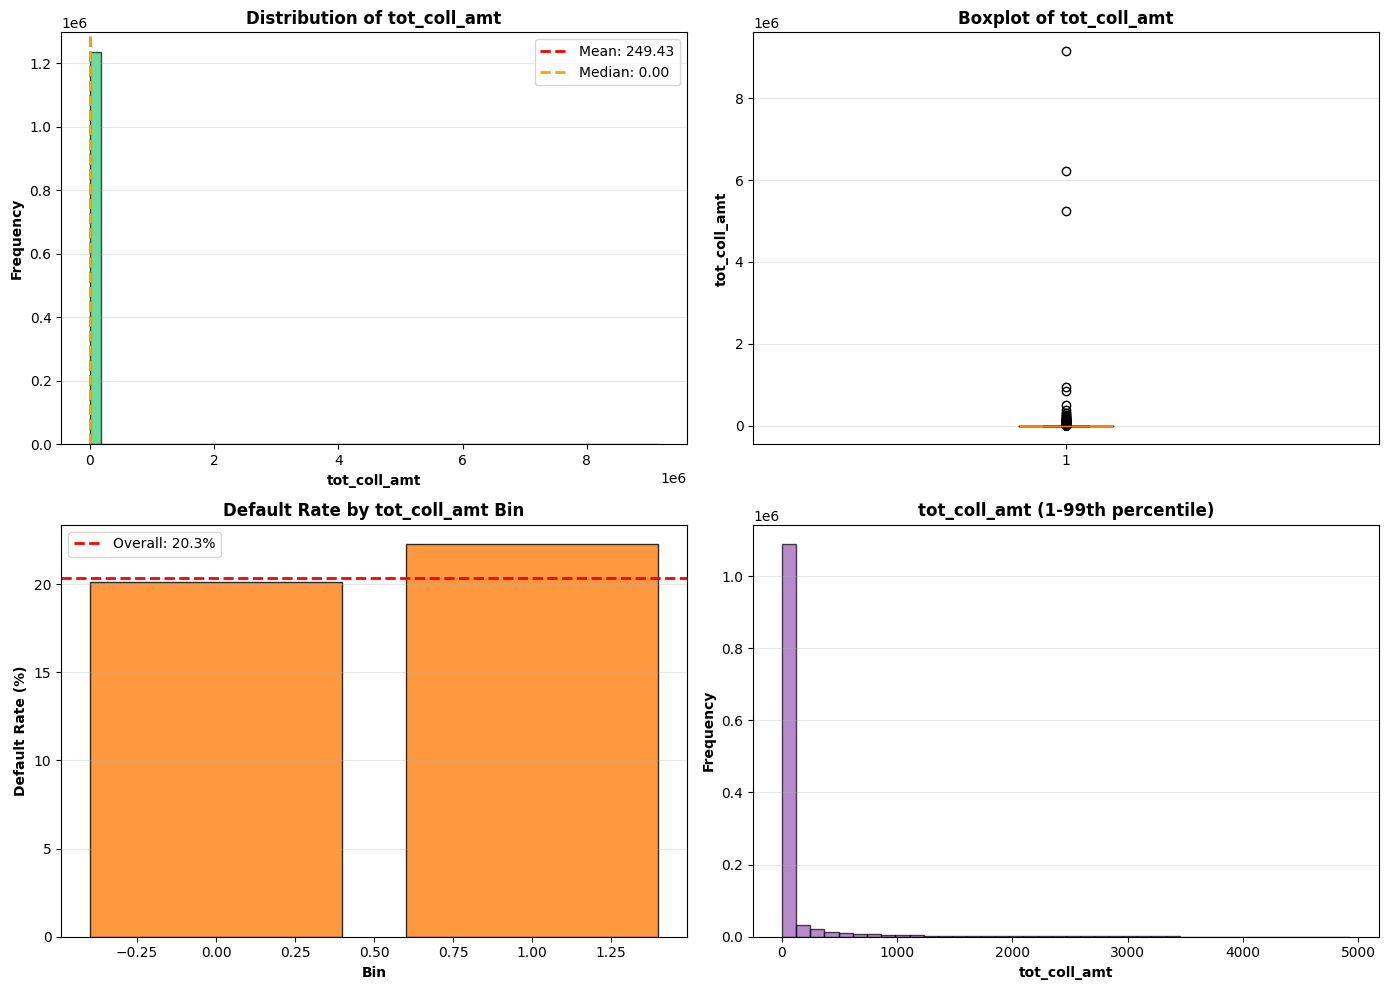

✅ Plots generated


In [88]:
from utils.eda_numerical_helpers import (
    profile_numeric_feature
)
result = profile_numeric_feature(df, 'tot_coll_amt', plot=True)

In [87]:
numerical_columns

Index(['loan_amnt', 'annual_inc', 'target', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', '

## tot_cur_bal

2026-01-08 23:25:26.520 | INFO     | utils.eda_numerical_helpers:profile_numeric_feature:40 - Profiling numeric feature: tot_cur_bal
2026-01-08 23:25:26.762 | SUCCESS  | utils.eda_numerical_helpers:profile_numeric_feature:170 - Profiling complete for tot_cur_bal



NUMERIC FEATURE PROFILE: tot_cur_bal

──────────────────────────────────────────────────────────────────────
Basic Statistics:
  Valid rows: 1,236,111 (94.82%)
  Missing: 67,527 (5.18%)
  Unique values: 395109
  Range: [0.00, 8000078.00]
  Mean: 141079.60, Median: 80335.00
  Std Dev: 157311.42, Skew: 2.91

──────────────────────────────────────────────────────────────────────
Percentiles (for capping decisions):
  p1: 3125.00
  p5: 8653.00
  p95: 432981.50
  p99: 672919.70
  p99.5: 804269.25

──────────────────────────────────────────────────────────────────────
Association with Default:
  Point-biserial correlation: -0.0718
  P-value: 0.00e+00
  Information Value (IV): 0.0413
  IV Interpretation: WEAK

──────────────────────────────────────────────────────────────────────
Default Rate by Bin:
                 _bin  count  defaults  default_rate_%
    (-0.001, 14100.0] 123613     25737       20.820626
   (14100.0, 24210.0] 123621     27946       22.606192
   (24210.0, 35360.0] 123607 

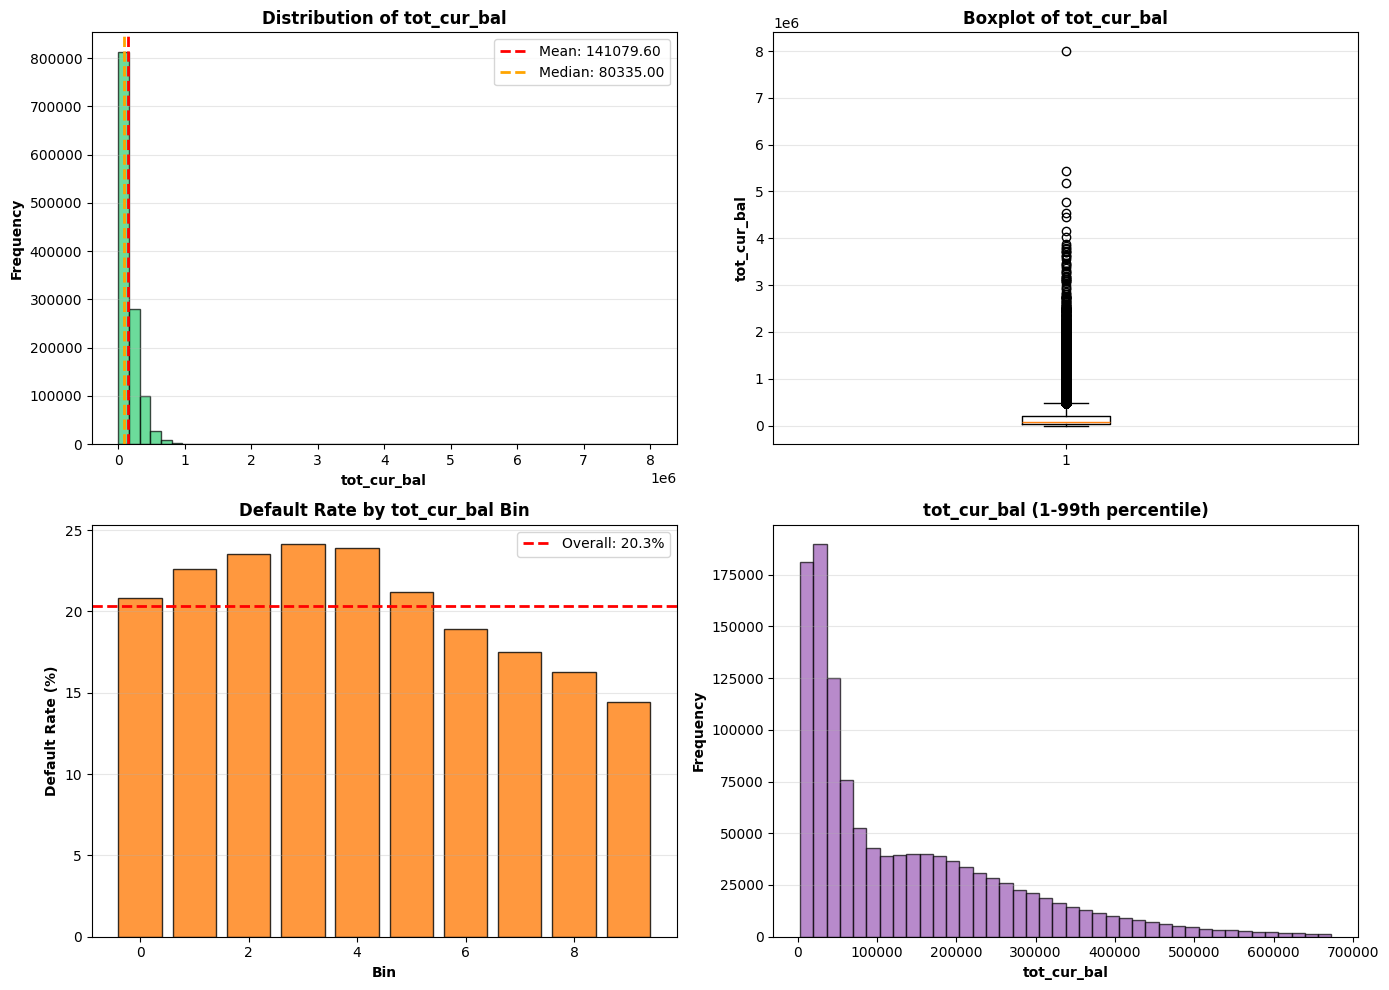

✅ Plots generated


In [90]:
## tot_cur_bal
from utils.eda_numerical_helpers import (
    profile_numeric_feature
)
result = profile_numeric_feature(df, 'tot_cur_bal', plot=True)

2026-01-08 23:30:19.508 | INFO     | utils.eda_numerical_helpers:profile_numeric_feature:40 - Profiling numeric feature: debt_to_income_ratio
2026-01-08 23:30:19.800 | SUCCESS  | utils.eda_numerical_helpers:profile_numeric_feature:170 - Profiling complete for debt_to_income_ratio



NUMERIC FEATURE PROFILE: debt_to_income_ratio

──────────────────────────────────────────────────────────────────────
Basic Statistics:
  Valid rows: 1,236,111 (94.82%)
  Missing: 67,527 (5.18%)
  Unique values: 1186988
  Range: [0.00, 968489.00]
  Mean: 35.00, Median: 1.24
  Std Dev: 3255.75, Skew: 143.13

──────────────────────────────────────────────────────────────────────
Percentiles (for capping decisions):
  p1: 0.06
  p5: 0.18
  p95: 4.82
  p99: 6.61
  p99.5: 7.51

──────────────────────────────────────────────────────────────────────
Association with Default:
  Point-biserial correlation: -0.0005
  P-value: 6.04e-01
  Information Value (IV): 0.0331
  IV Interpretation: WEAK

──────────────────────────────────────────────────────────────────────
Default Rate by Bin:
             _bin  count  defaults  default_rate_%
  (-0.001, 0.273] 123612     23225       18.788629
   (0.273, 0.436] 123611     26335       21.304738
   (0.436, 0.609] 123611     29040       23.493055
   (0.609,

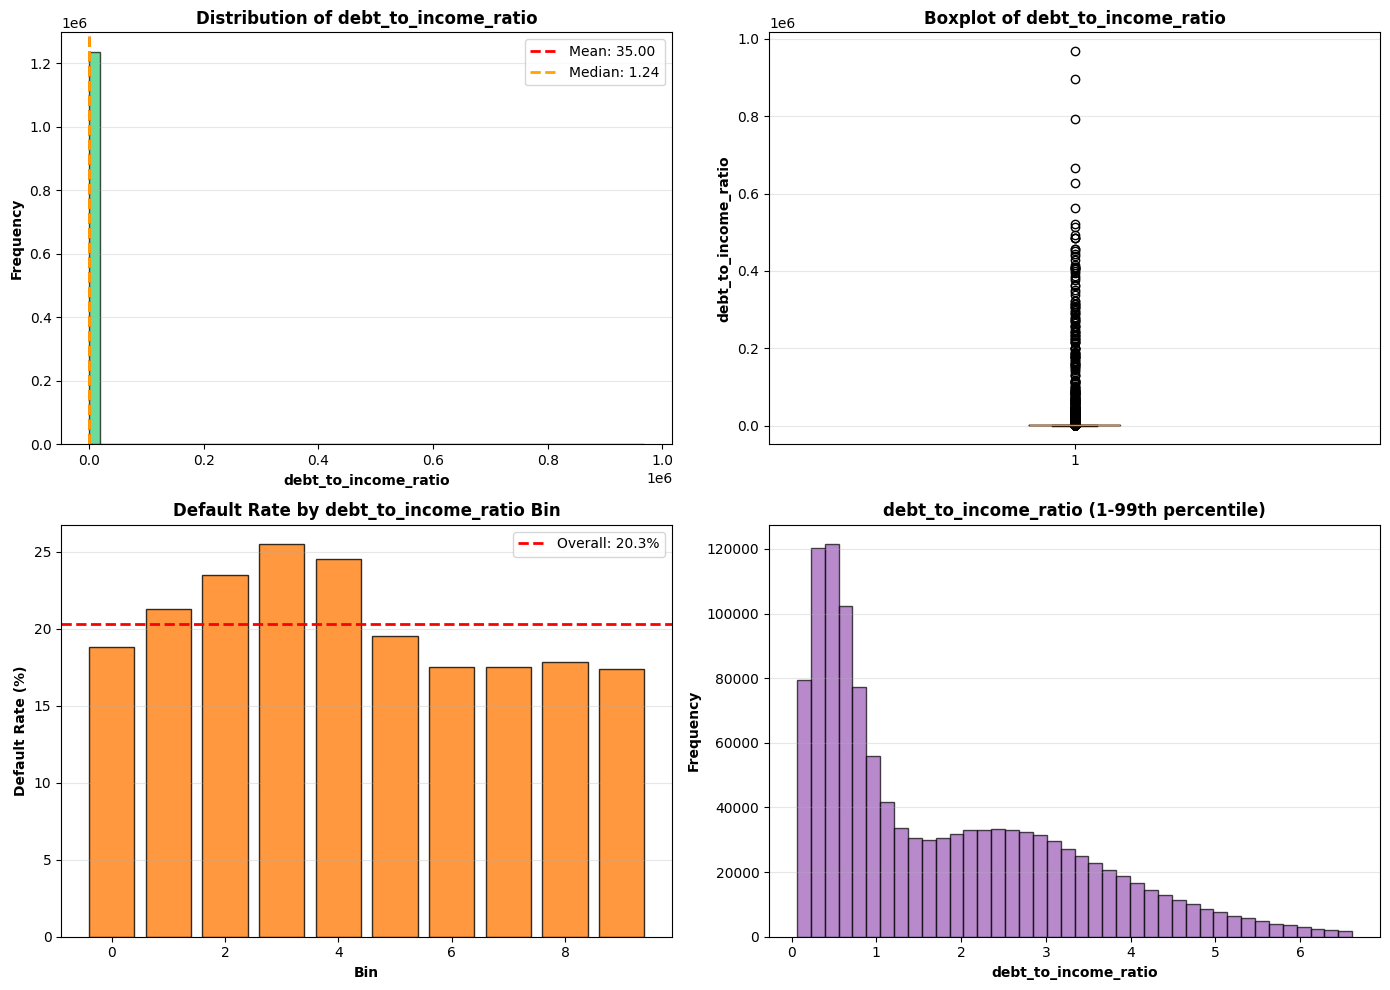

✅ Plots generated


In [91]:
df['debt_to_income_ratio'] = df['tot_cur_bal'] / (df['annual_inc'] + 1)
from utils.eda_numerical_helpers import (
    profile_numeric_feature
)
result = profile_numeric_feature(df, 'debt_to_income_ratio', plot=True)

## open_acc_6m

2026-01-08 23:33:38.482 | INFO     | utils.eda_numerical_helpers:profile_numeric_feature:40 - Profiling numeric feature: open_acc_6m
2026-01-08 23:33:38.618 | SUCCESS  | utils.eda_numerical_helpers:profile_numeric_feature:170 - Profiling complete for open_acc_6m



NUMERIC FEATURE PROFILE: open_acc_6m

──────────────────────────────────────────────────────────────────────
Basic Statistics:
  Valid rows: 499,575 (38.32%)
  Missing: 804,063 (61.68%)
  Unique values: 19
  Range: [0.00, 18.00]
  Mean: 1.06, Median: 1.00
  Std Dev: 1.21, Skew: 1.61

──────────────────────────────────────────────────────────────────────
Percentiles (for capping decisions):
  p1: 0.00
  p5: 0.00
  p95: 3.00
  p99: 5.00
  p99.5: 6.00

──────────────────────────────────────────────────────────────────────
Association with Default:
  Point-biserial correlation: 0.0584
  P-value: 0.00e+00
  Information Value (IV): 0.0164
  IV Interpretation: NEGLIGIBLE

──────────────────────────────────────────────────────────────────────
Default Rate by Bin:
         _bin  count  defaults  default_rate_%
(-0.001, 1.0] 361022     77549       21.480408
   (1.0, 2.0]  82267     20507       24.927371
   (2.0, 3.0]  34672      9277       26.756461
  (3.0, 18.0]  21614      6480       29.98056

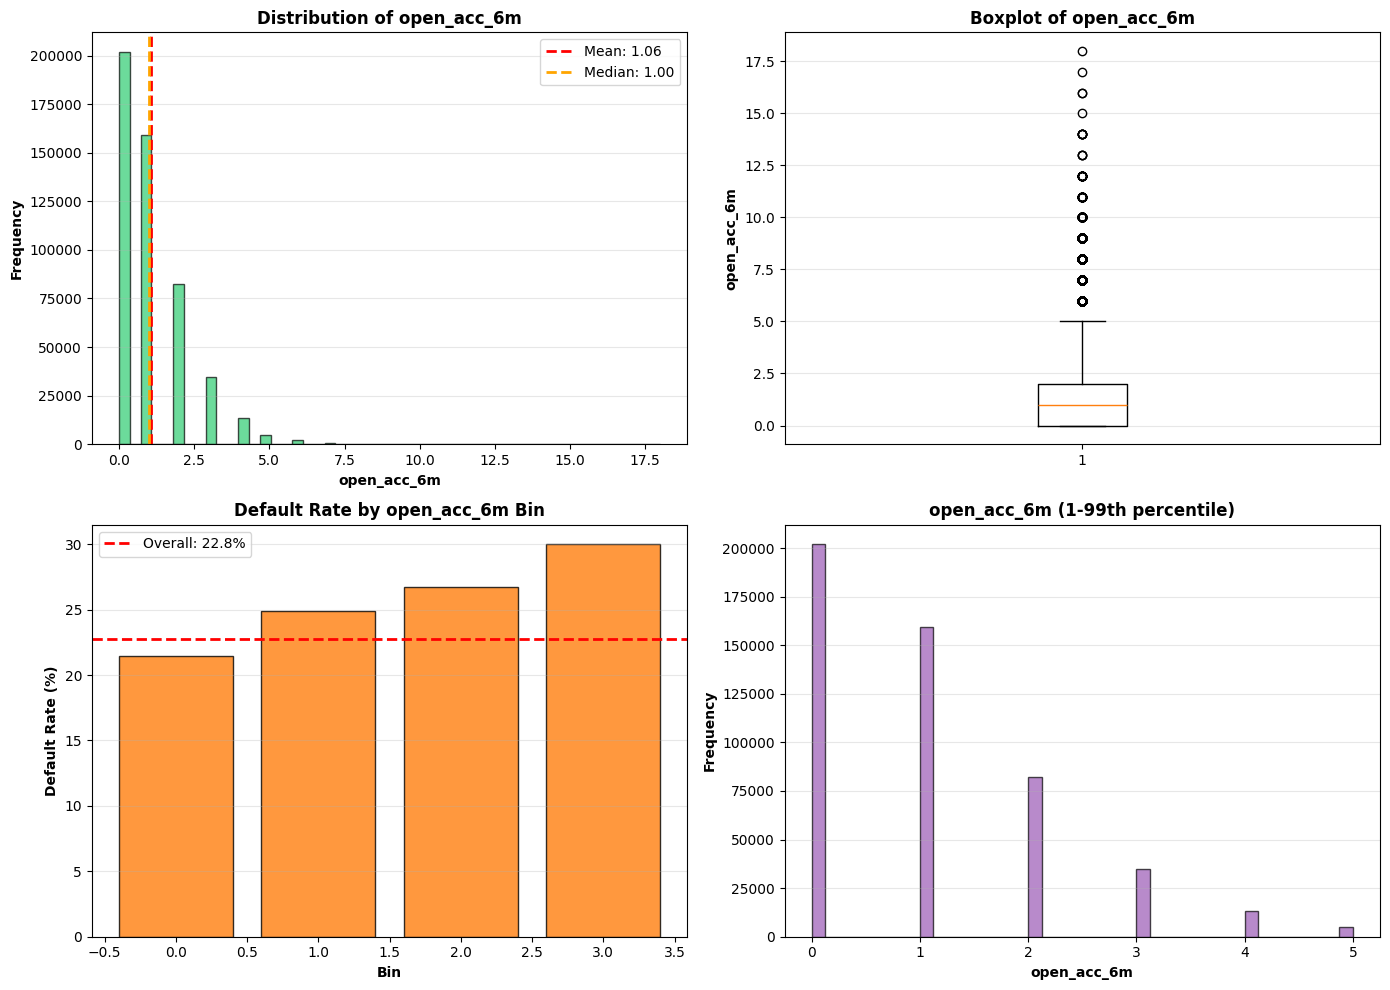

✅ Plots generated


In [ ]:
# open_acc_6m
from utils.eda_numerical_helpers import (
    profile_numeric_feature
)
result = profile_numeric_feature(df, 'open_acc_6m', plot=True)

2026-01-08 23:39:44.272 | INFO     | utils.eda_numerical_helpers:profile_numeric_feature:40 - Profiling numeric feature: open_acc_6m
2026-01-08 23:39:44.499 | SUCCESS  | utils.eda_numerical_helpers:profile_numeric_feature:170 - Profiling complete for open_acc_6m



NUMERIC FEATURE PROFILE: open_acc_6m

──────────────────────────────────────────────────────────────────────
Basic Statistics:
  Valid rows: 1,303,638 (100.00%)
  Missing: 0 (0.00%)
  Unique values: 19
  Range: [0.00, 18.00]
  Mean: 0.41, Median: 0.00
  Std Dev: 0.91, Skew: 3.01

──────────────────────────────────────────────────────────────────────
Percentiles (for capping decisions):
  p1: 0.00
  p5: 0.00
  p95: 2.00
  p99: 4.00
  p99.5: 5.00

──────────────────────────────────────────────────────────────────────
Association with Default:
  Point-biserial correlation: 0.0613
  P-value: 0.00e+00
  Information Value (IV): 0.0165
  IV Interpretation: NEGLIGIBLE

──────────────────────────────────────────────────────────────────────
Default Rate by Bin:
         _bin   count  defaults  default_rate_%
(-0.001, 1.0] 1165085    225422       19.348116
   (1.0, 2.0]   82267     20507       24.927371
  (2.0, 18.0]   56286     15757       27.994528
  Pattern: MONOTONIC (increasing)

Generating

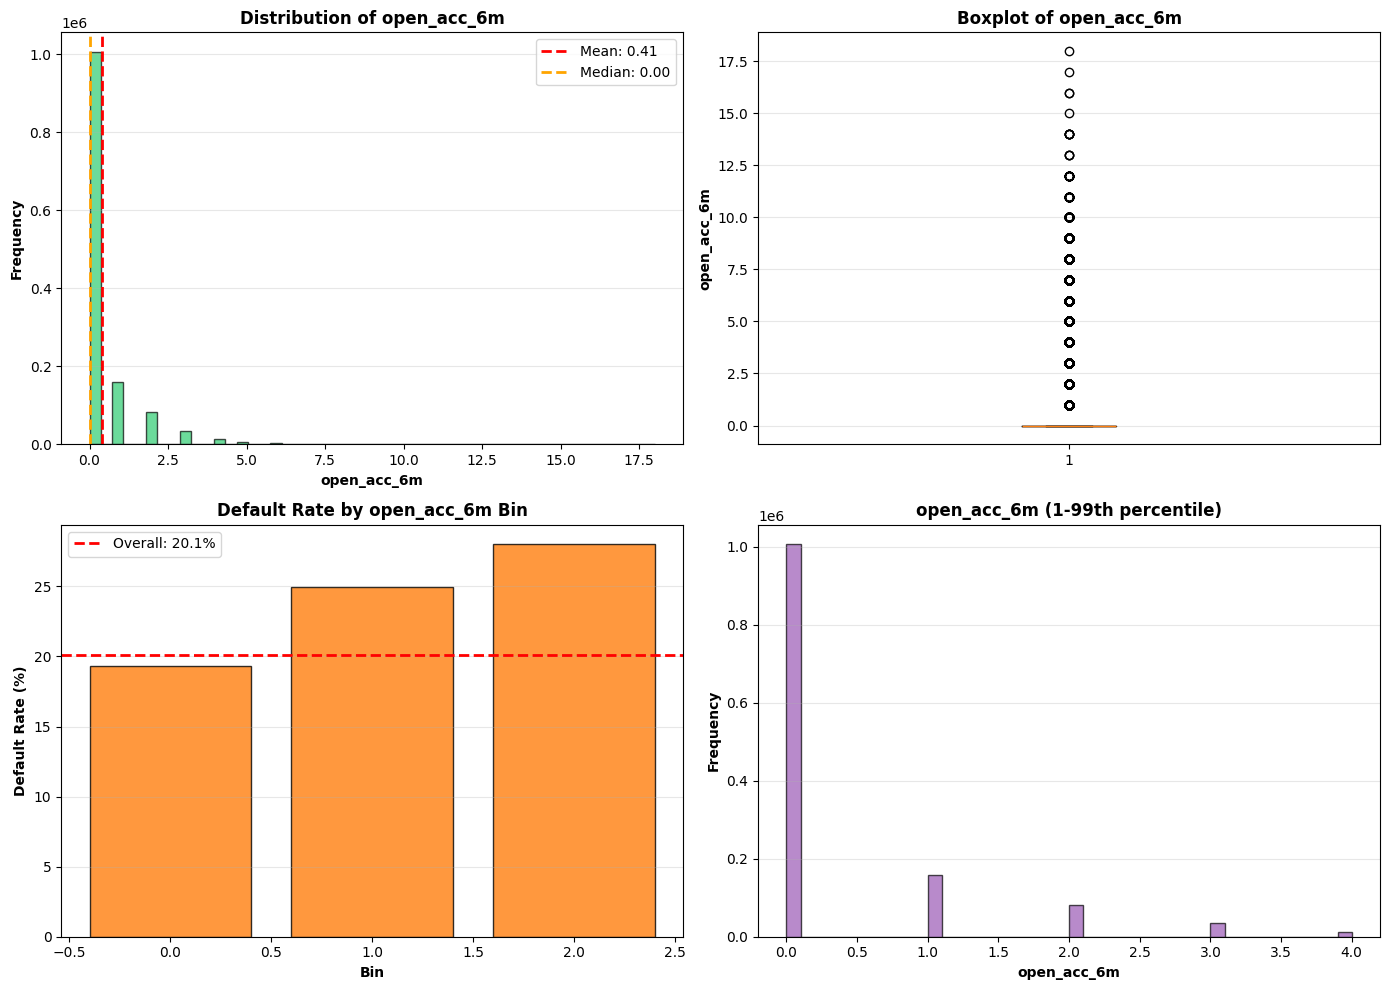

✅ Plots generated


In [94]:
df['open_acc_6m'].fillna(0, inplace=True)
from utils.eda_numerical_helpers import (
    profile_numeric_feature
)
result = profile_numeric_feature(df, 'open_acc_6m', plot=True)


2026-01-08 23:47:16.166 | INFO     | utils.eda_numerical_helpers:profile_numeric_feature:40 - Profiling numeric feature: recent_intensive
2026-01-08 23:47:16.354 | SUCCESS  | utils.eda_numerical_helpers:profile_numeric_feature:170 - Profiling complete for recent_intensive



NUMERIC FEATURE PROFILE: recent_intensive

──────────────────────────────────────────────────────────────────────
Basic Statistics:
  Valid rows: 1,303,638 (100.00%)
  Missing: 0 (0.00%)
  Unique values: 272
  Range: [0.00, 648.00]
  Mean: 5.53, Median: 0.00
  Std Dev: 15.40, Skew: 5.95

──────────────────────────────────────────────────────────────────────
Percentiles (for capping decisions):
  p1: 0.00
  p5: 0.00
  p95: 32.00
  p99: 72.00
  p99.5: 92.00

──────────────────────────────────────────────────────────────────────
Association with Default:
  Point-biserial correlation: 0.0511
  P-value: 0.00e+00
  Information Value (IV): 0.0187
  IV Interpretation: NEGLIGIBLE

──────────────────────────────────────────────────────────────────────
Default Rate by Bin:
         _bin   count  defaults  default_rate_%
(-0.001, 8.0] 1056294    200891       19.018474
  (8.0, 18.0]  118078     27222       23.054252
(18.0, 648.0]  129266     33573       25.972027
  Pattern: MONOTONIC (increasing)


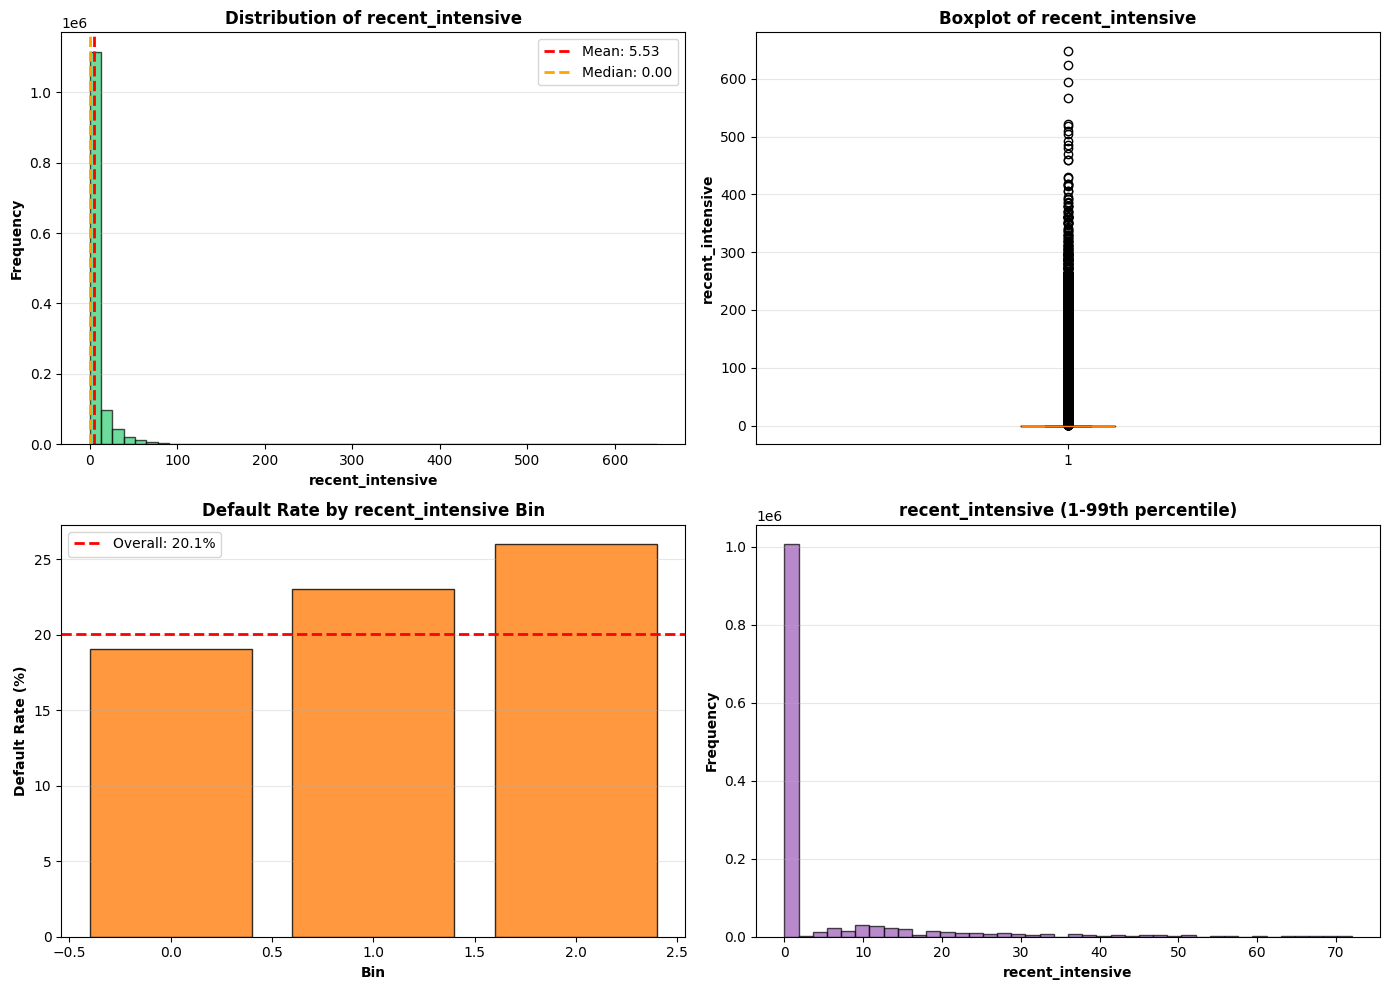

✅ Plots generated


In [ ]:
# 3. Interaction with total accounts
#Makes business sense → Captures the pace of account opening relative to total accounts. 
# Example: Person A: open_acc_6m=1, open_acc=5 → recent_intensive=5 (slow, 20% default)
# Person B: open_acc_6m=3, open_acc=5 → recent_intensive=15 (frantic, 26% default)

df['recent_intensive'] = df['open_acc_6m'] * df['open_acc']
# Captures: "velocity × breadth" of account opening
from utils.eda_numerical_helpers import (
    profile_numeric_feature
)
result = profile_numeric_feature(df, 'recent_intensive', plot=True)

### open_act_il